In [30]:
# Data Analysis Notebook for x_dif Target Variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display plots inline
%matplotlib inline

# Increase plot resolution for retina displays
%config InlineBackend.figure_format = 'retina'


In [31]:
# Load the data
data_file = '/Users/paulj/Documents/Double_Degree_Tsinghua/Master_thesis/code/my_code/ASTGCN-2019-pytorch/data/measurements_random_poses_cleaned.csv'

# Check if the data file exists
if os.path.exists(data_file):
    df = pd.read_csv(data_file)
    print(f"Data loaded from {data_file}")
    print(f"Dataset shape: {df.shape}")
else:
    print(f"Data file {data_file} does not exist. Please check the file path.")


Data loaded from /Users/paulj/Documents/Double_Degree_Tsinghua/Master_thesis/code/my_code/ASTGCN-2019-pytorch/data/measurements_random_poses_cleaned.csv
Dataset shape: (2773, 19)


In [32]:
#get rid of first row
df = df.loc[1:]

In [33]:
# Display first few rows
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


step_order     x_dif     y_dif     z_dif   rx_dif   ry_dif   rz_dif  \
1           1  0.010346 -0.480444  1.006320  3.10253  1.66683  1.57927   
2           2 -0.005134 -0.413612  0.846258  3.60029  1.58947  1.66501   
3           3 -0.079817 -0.454235  0.841657  3.16162  1.78563  1.71706   
4           4 -0.209376 -0.414683  1.151100  3.68361  1.40790  1.58468   
5           5 -0.099834 -0.519876  0.956268  3.49177  1.59286  1.40997   

   joint_1  joint_2  joint_3  joint_4   joint_5   joint_6       x_set  \
1 -4.08444 -2.69460  1.69873 -2.03100  0.992750 -0.067304  335.137434   
2 -3.65442 -2.82442  2.02635 -2.23002  0.148482 -0.104726  366.993514   
3 -4.46788 -2.96612  2.05675 -2.01600  1.453920 -0.021888  430.952097   
4 -4.46573 -2.37409  1.26161 -2.22417  0.799081  0.051268  555.529736   
5 -4.22032 -2.80117  1.72054 -2.02247  0.567164 -0.025526  416.689614   

         y_set       z_set      rx_set     ry_set     rz_set  
1 -3133.887256 -222.167200  -87.306050 -24.393665 -89.824879  
2 -3193.509388 -380.786198  -92.666075  -0.791073 -91.414451  
3 -3126.274965 -388.703087  -79.556220 -28.424122 -85.513892  
4 -3120.965917  -73.143056 -101.859378   9.090933 -95.146109  
5 -3060.084324 -270.606828  -92.325246   7.546504 -91.378483

In [34]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
step_order    0
x_dif         0
y_dif         0
z_dif         0
rx_dif        0
ry_dif        0
rz_dif        0
joint_1       0
joint_2       0
joint_3       0
joint_4       0
joint_5       0
joint_6       0
x_set         0
y_set         0
z_set         0
rx_set        0
ry_set        0
rz_set        0
dtype: int64


In [35]:
# Handling missing values (if any)
if df.isnull().sum().any():
    print("Handling missing values by dropping rows with missing values.")
    df = df.dropna()
    print(f"New dataset shape after dropping missing values: {df.shape}")
else:
    print("No missing values detected.")


No missing values detected.


In [36]:
# Define target variable and input features
target_variable = 'rz_dif'  # Your current target is x deviation
joint_features = [f'joint_{i}' for i in range(1, 7)]
setpoint_features = ['x_set', 'y_set', 'z_set', 'rx_set', 'ry_set', 'rz_set']
input_features = joint_features + setpoint_features

# Ensure all necessary columns are present
required_columns = [target_variable] + input_features
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"The following required columns are missing from the dataset: {missing_columns}")
else:
    print("All required columns are present.")


All required columns are present.


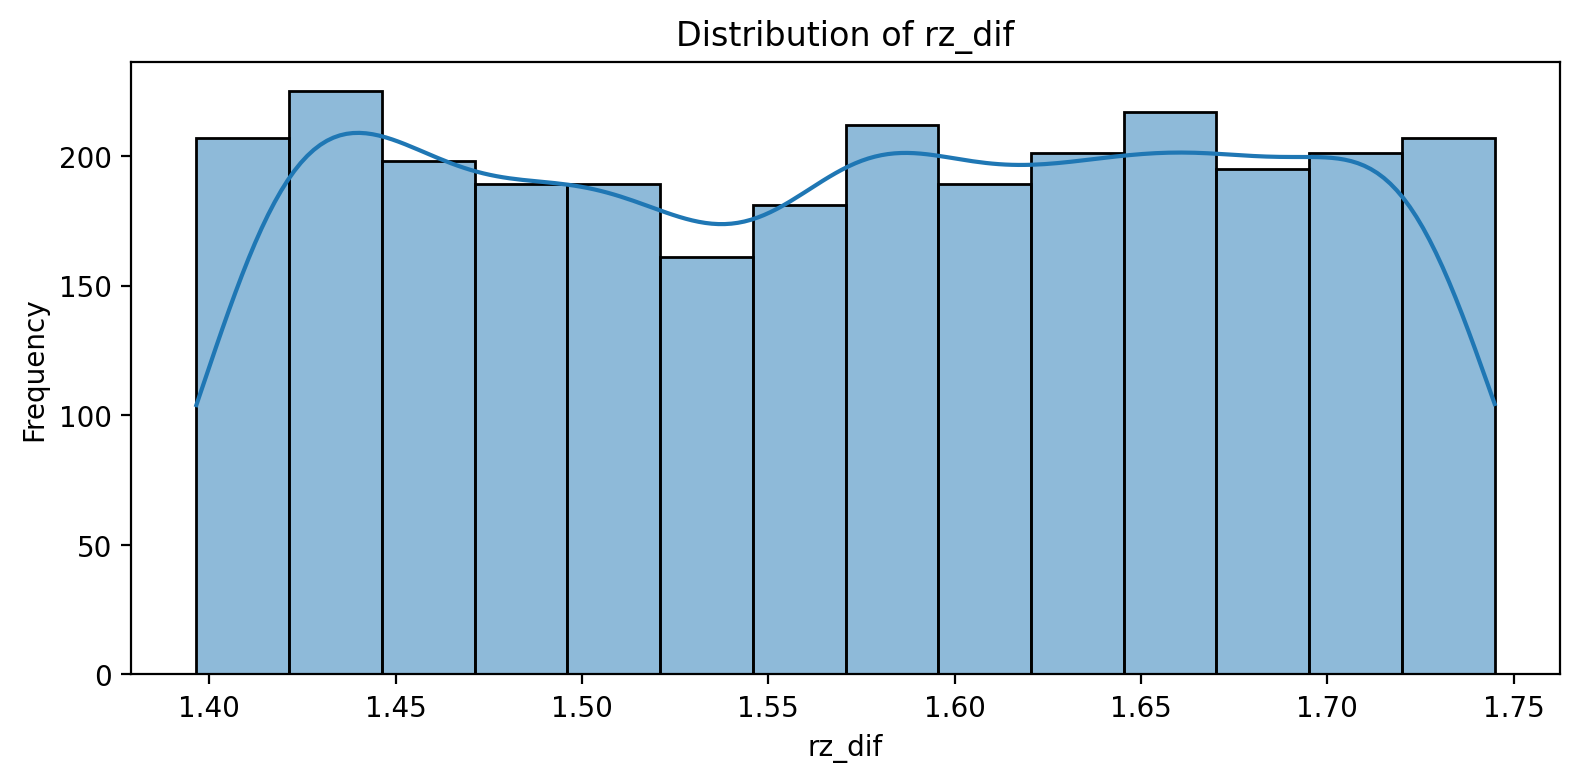

In [37]:
# Visualize distribution of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(df[target_variable], kde=True)
plt.title(f"Distribution of {target_variable}")
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [38]:
# Compute correlations between input features and the target variable
print("Correlation between input features and the target variable:")
corr_matrix = df[input_features + [target_variable]].corr()
corr_with_target = corr_matrix[[target_variable]].loc[input_features]
corr_with_target


Correlation between input features and the target variable:


rz_dif
joint_1 -0.016785
joint_2 -0.027278
joint_3  0.018785
joint_4  0.012840
joint_5  0.143058
joint_6 -0.010803
x_set   -0.043903
y_set   -0.004477
z_set    0.000545
rx_set   0.007205
ry_set  -0.265828
rz_set  -0.045852

/var/folders/f0/5y2fvxyx19v5c9s51q6qyp6c0000gp/T/ipykernel_21857/3752756821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target_sorted.index, y=corr_with_target_sorted[target_variable], palette='viridis')


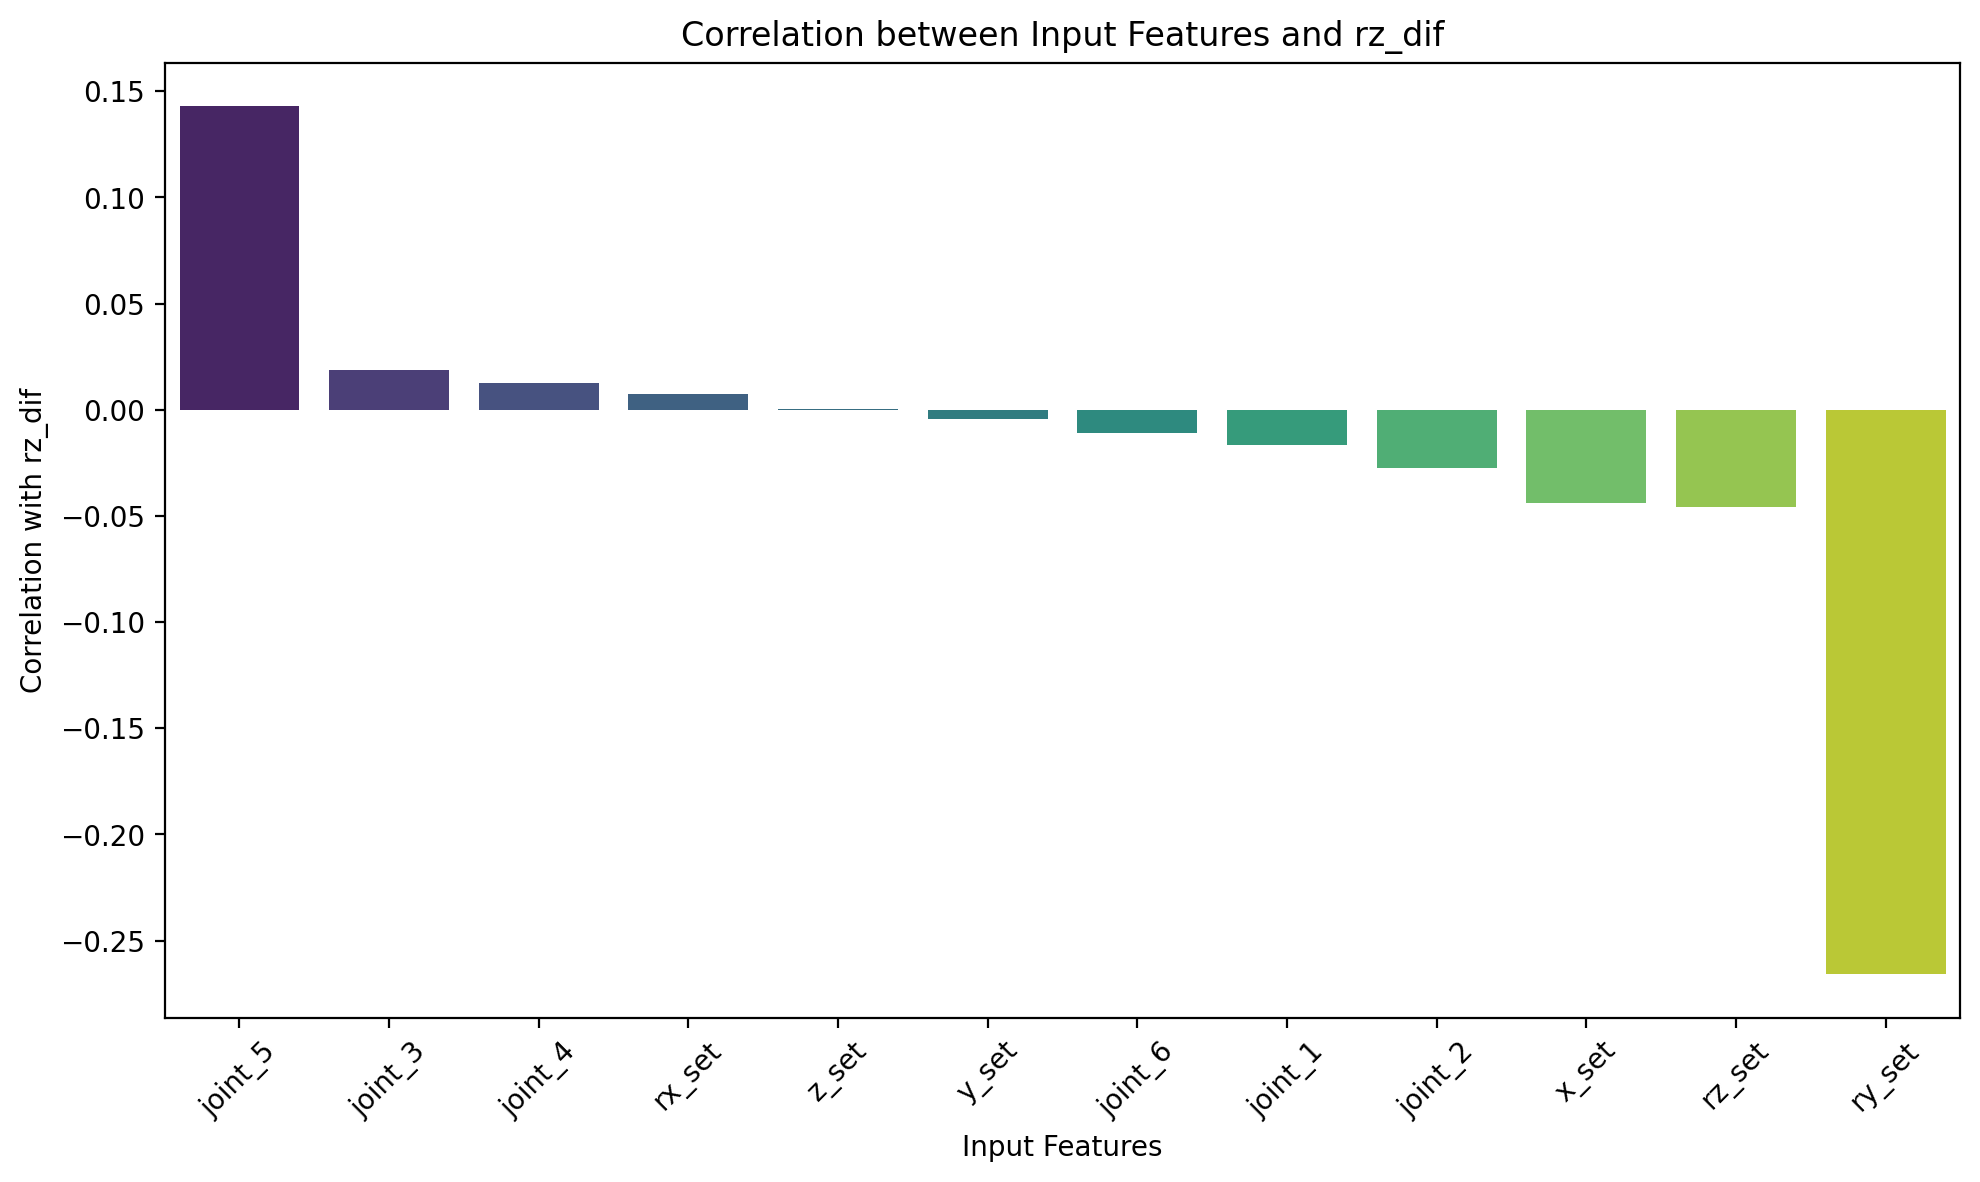

In [39]:
# Visualize correlations with a bar plot
plt.figure(figsize=(10, 6))
corr_with_target_sorted = corr_with_target.sort_values(by=target_variable, ascending=False)
sns.barplot(x=corr_with_target_sorted.index, y=corr_with_target_sorted[target_variable], palette='viridis')
plt.title(f"Correlation between Input Features and {target_variable}")
plt.xlabel("Input Features")
plt.ylabel(f"Correlation with {target_variable}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Identify features with high correlation to the target variable
threshold = 0.3  # Adjust the threshold based on your needs
high_corr_features = corr_with_target[
    corr_with_target[target_variable].abs() > threshold
]
print(f"Features with correlation |r| > {threshold} with {target_variable}:")
high_corr_features


Features with correlation |r| > 0.3 with rz_dif:


Empty DataFrame
Columns: [rz_dif]
Index: []

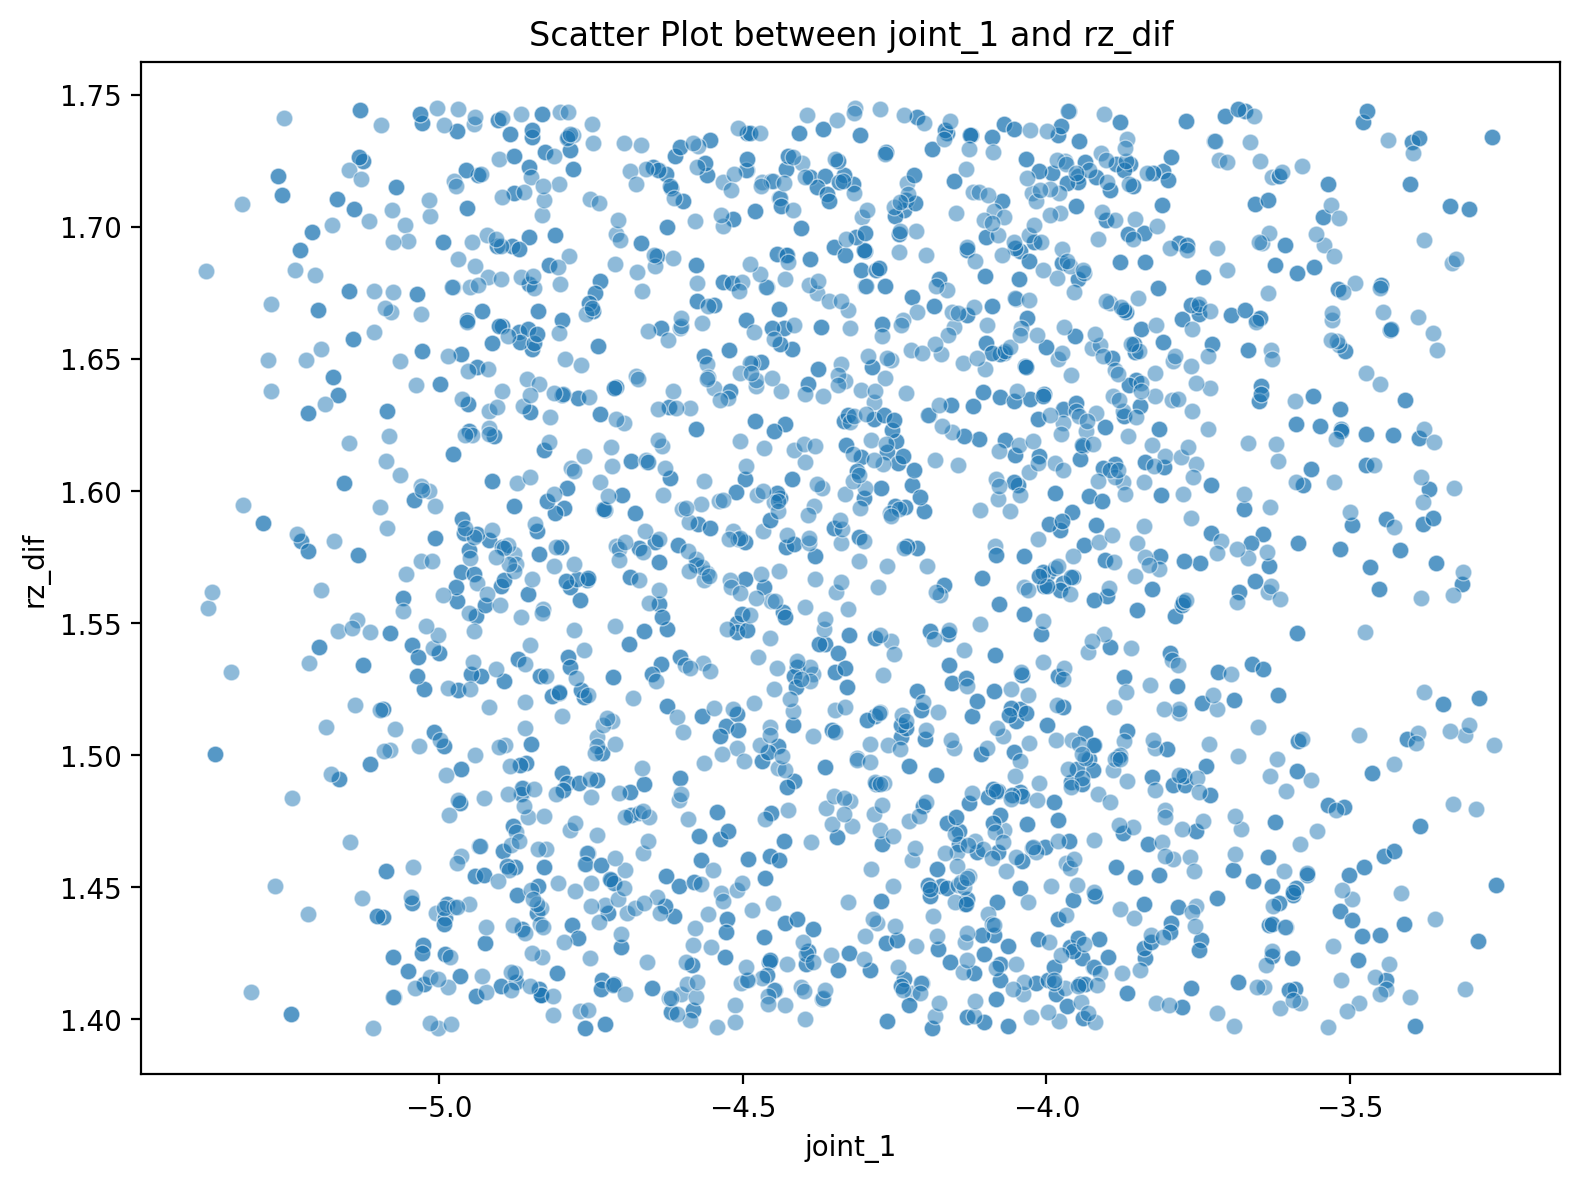

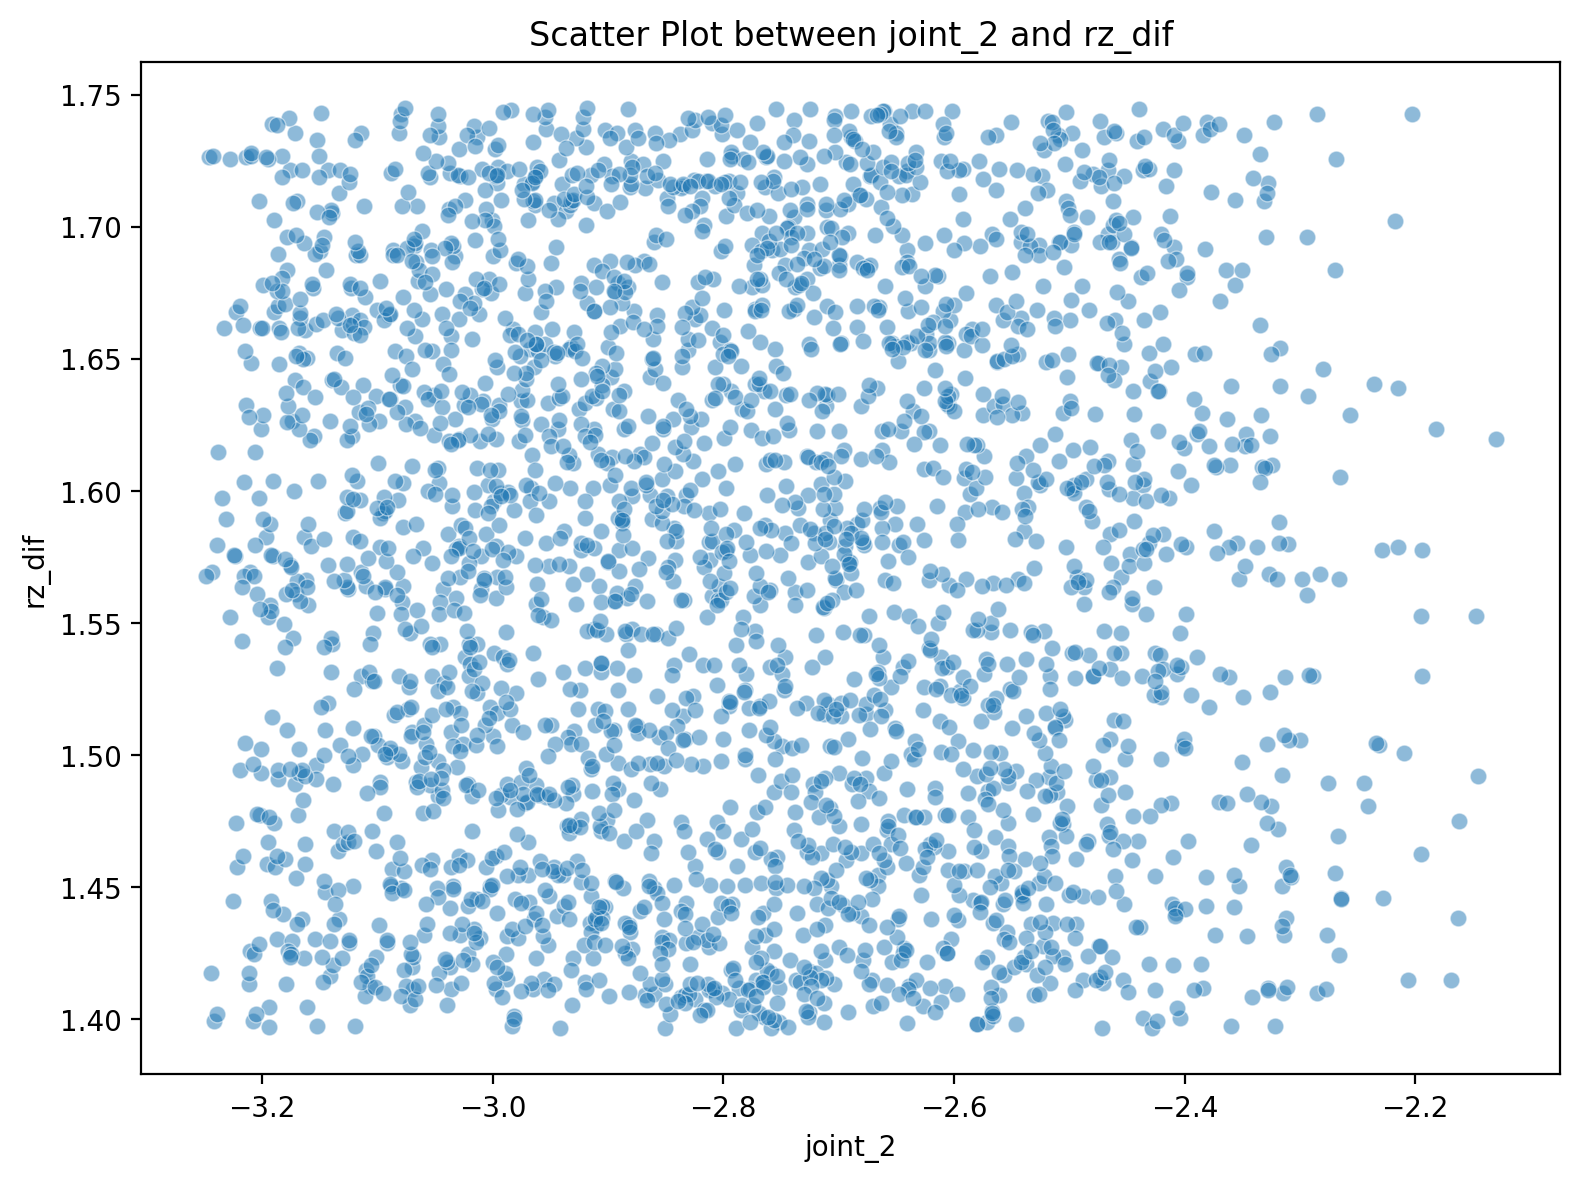

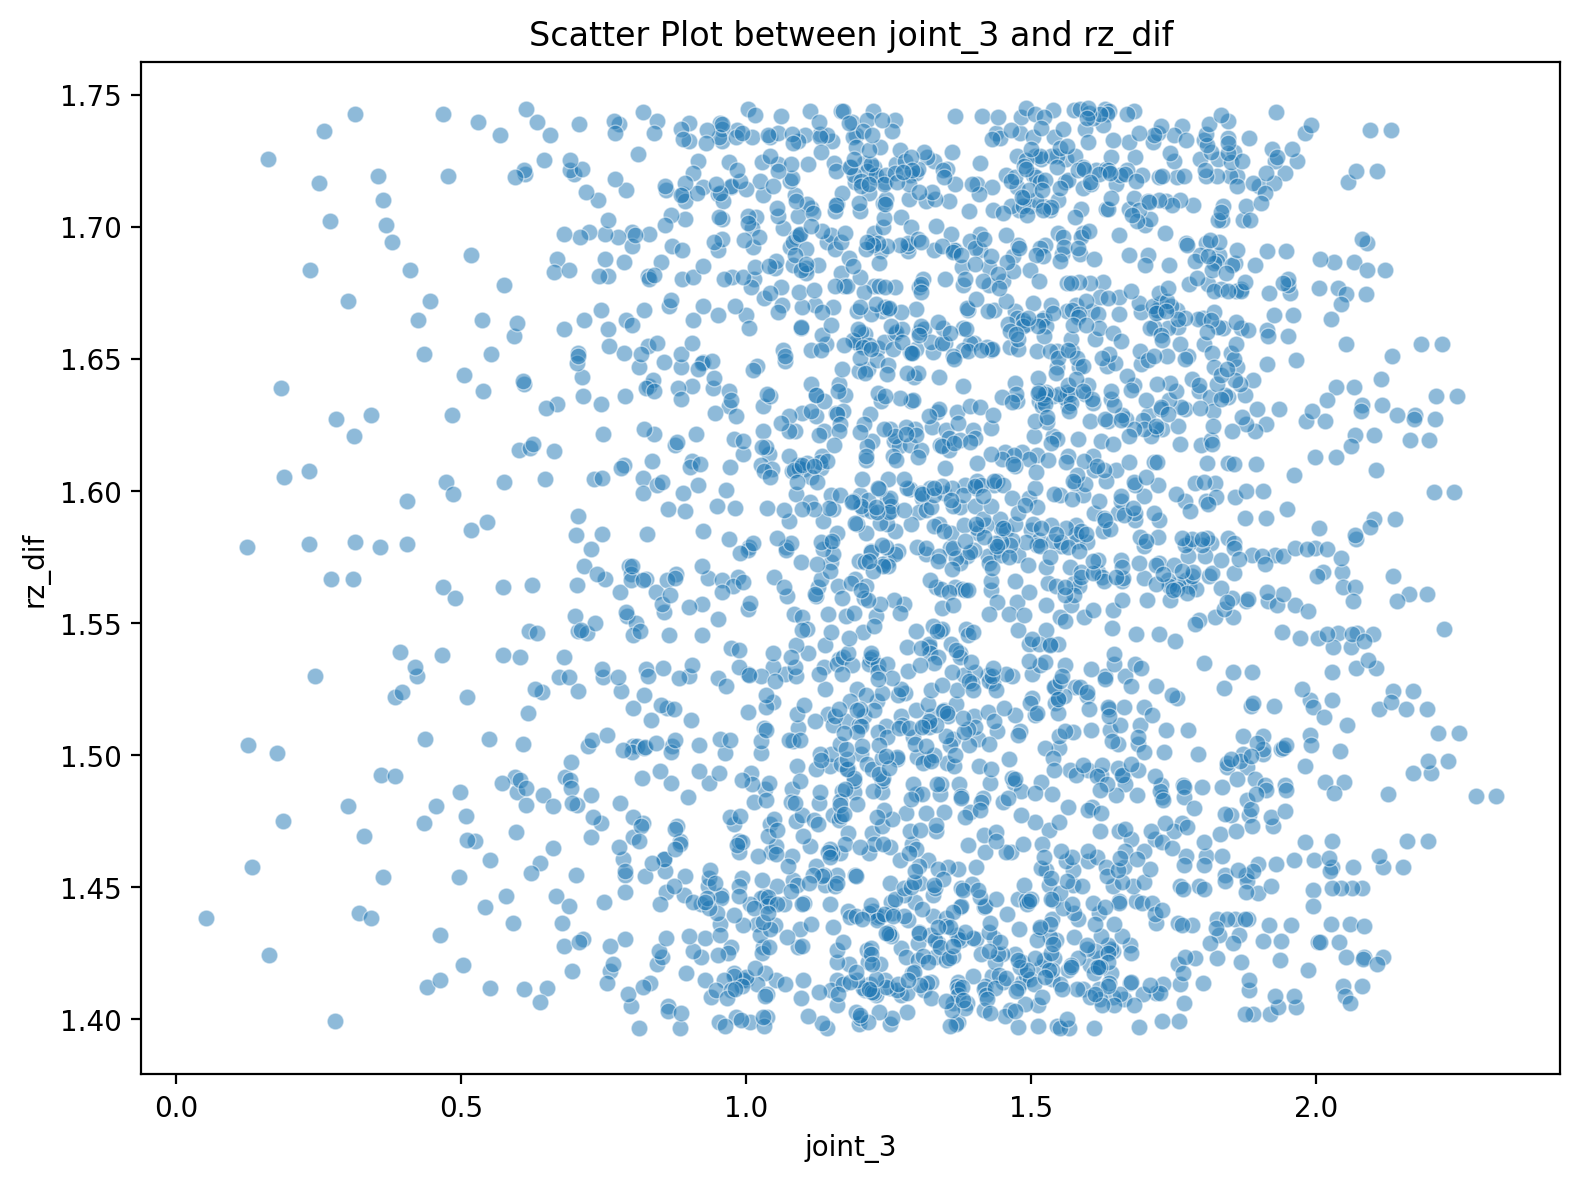

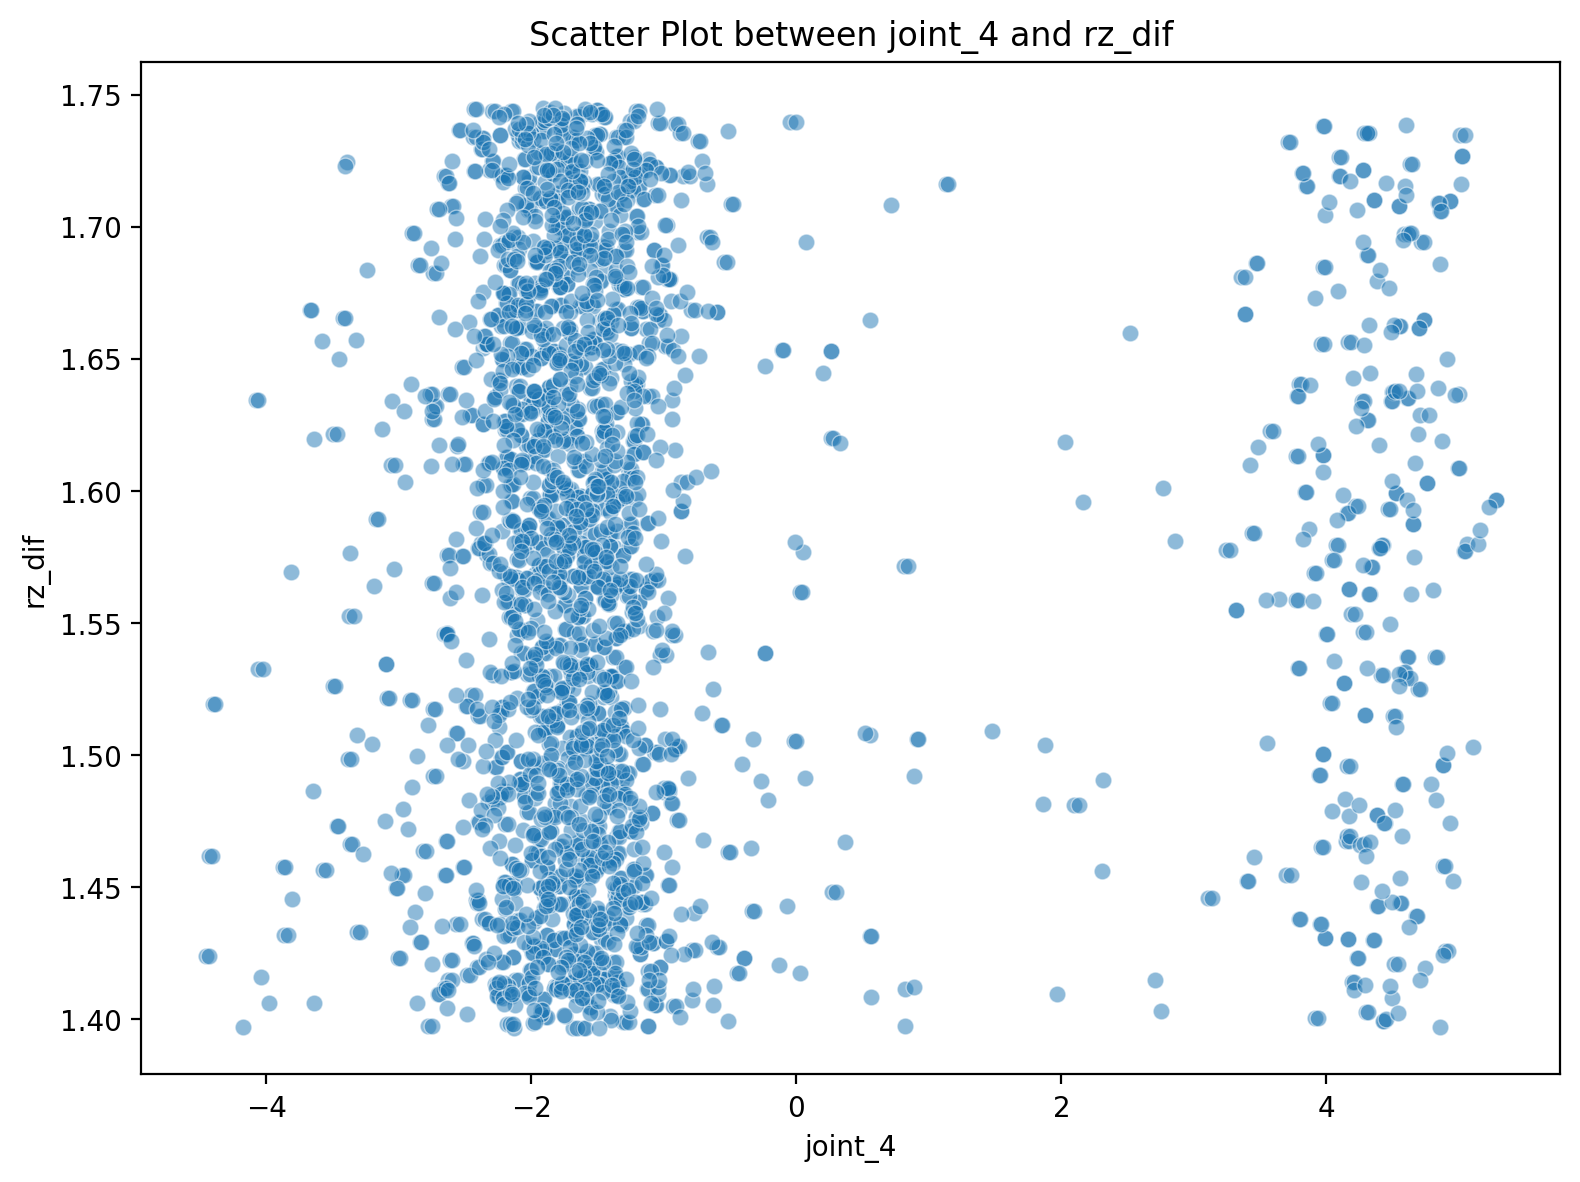

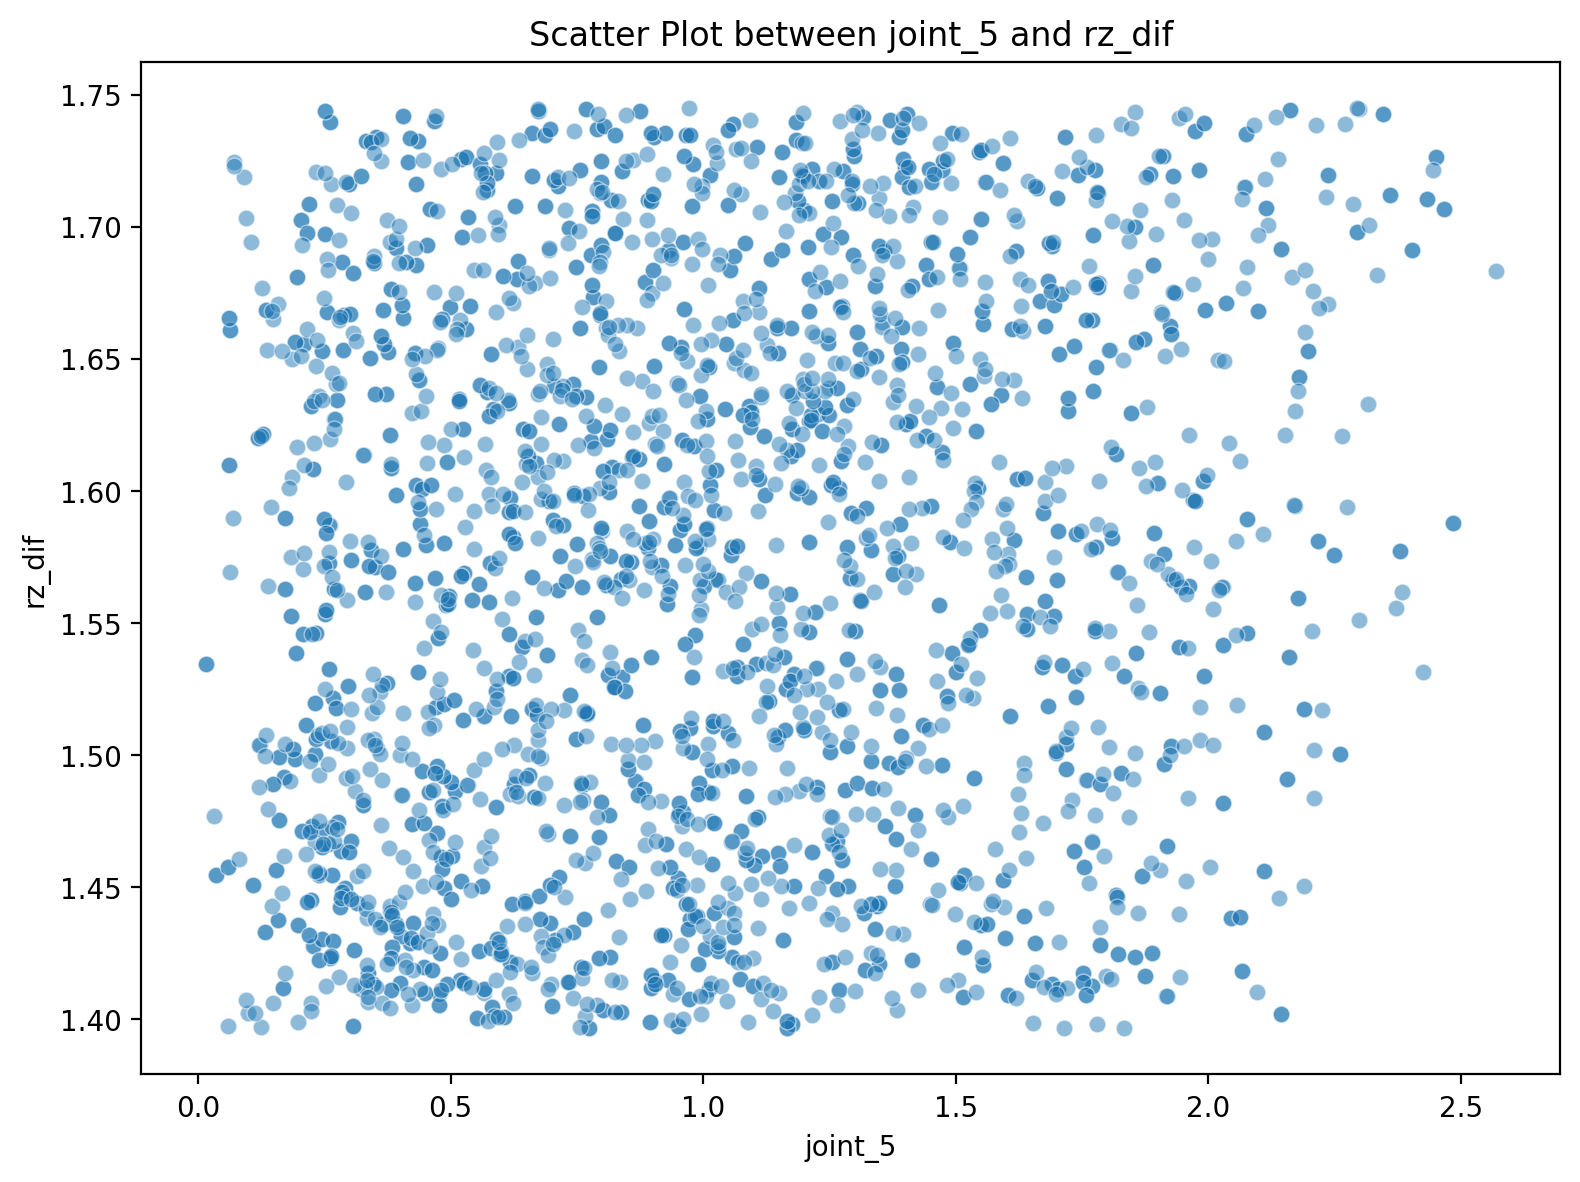

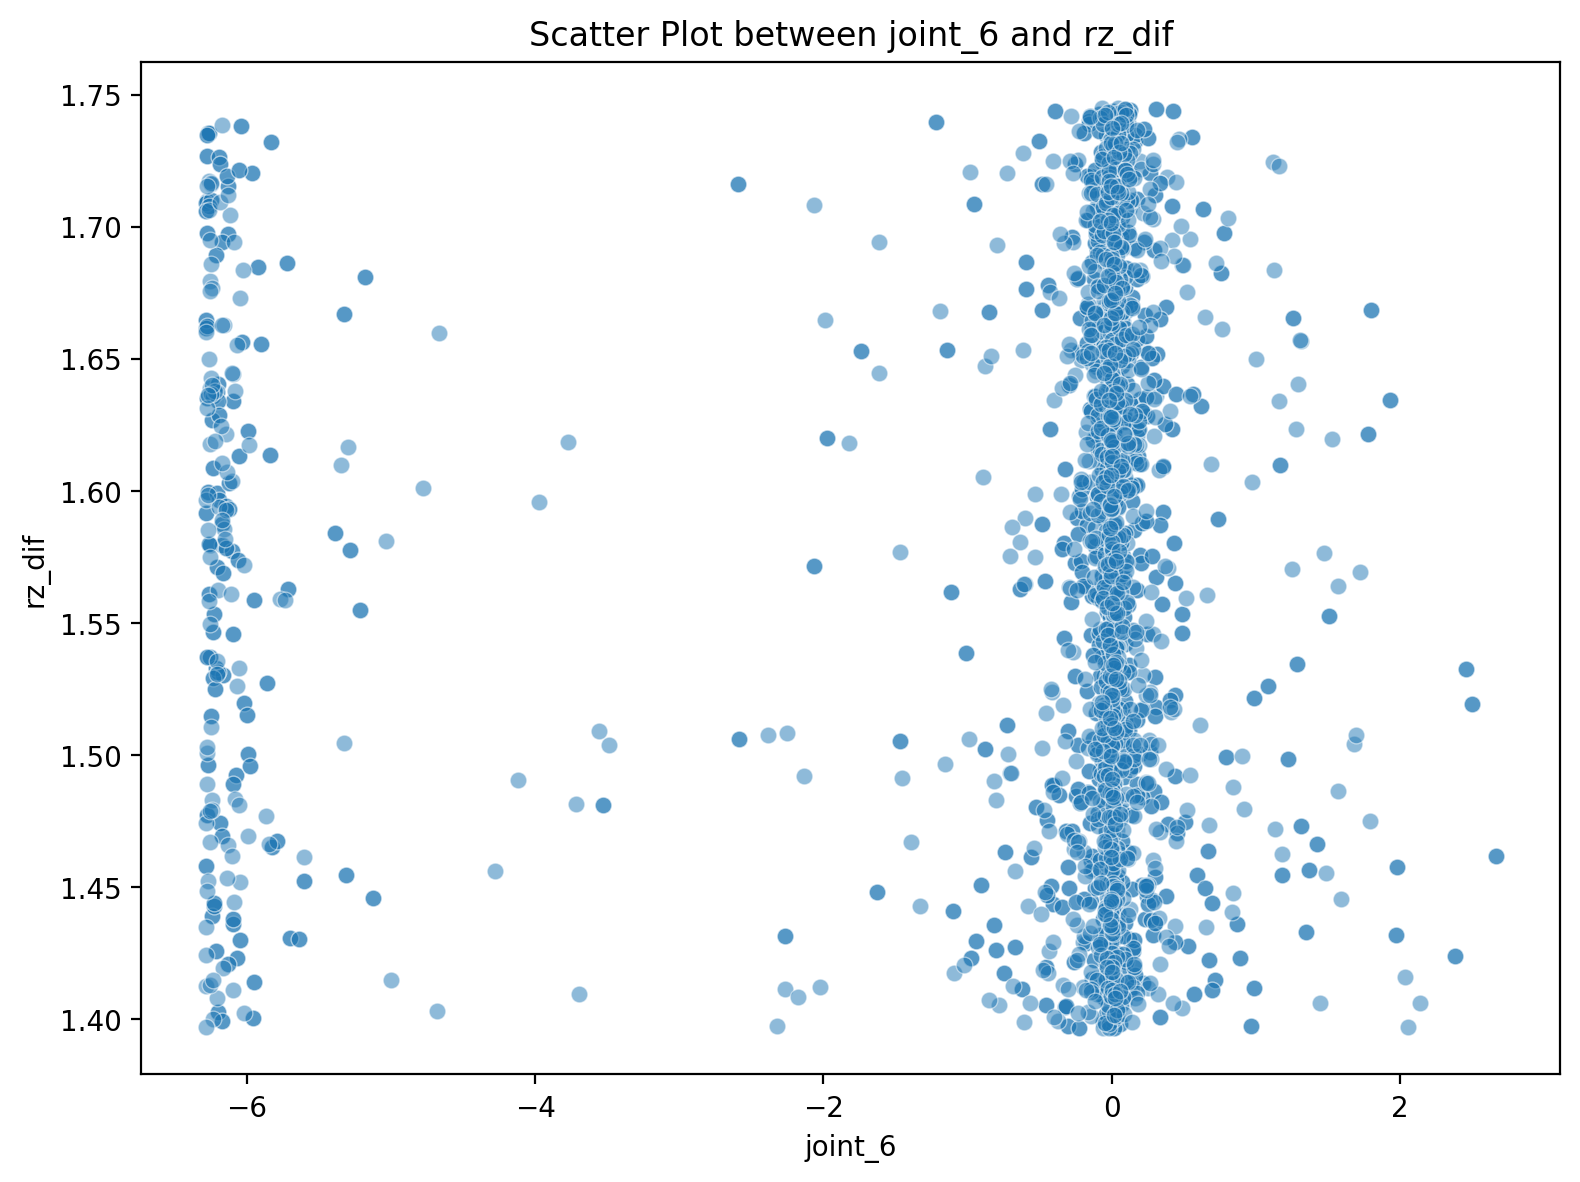

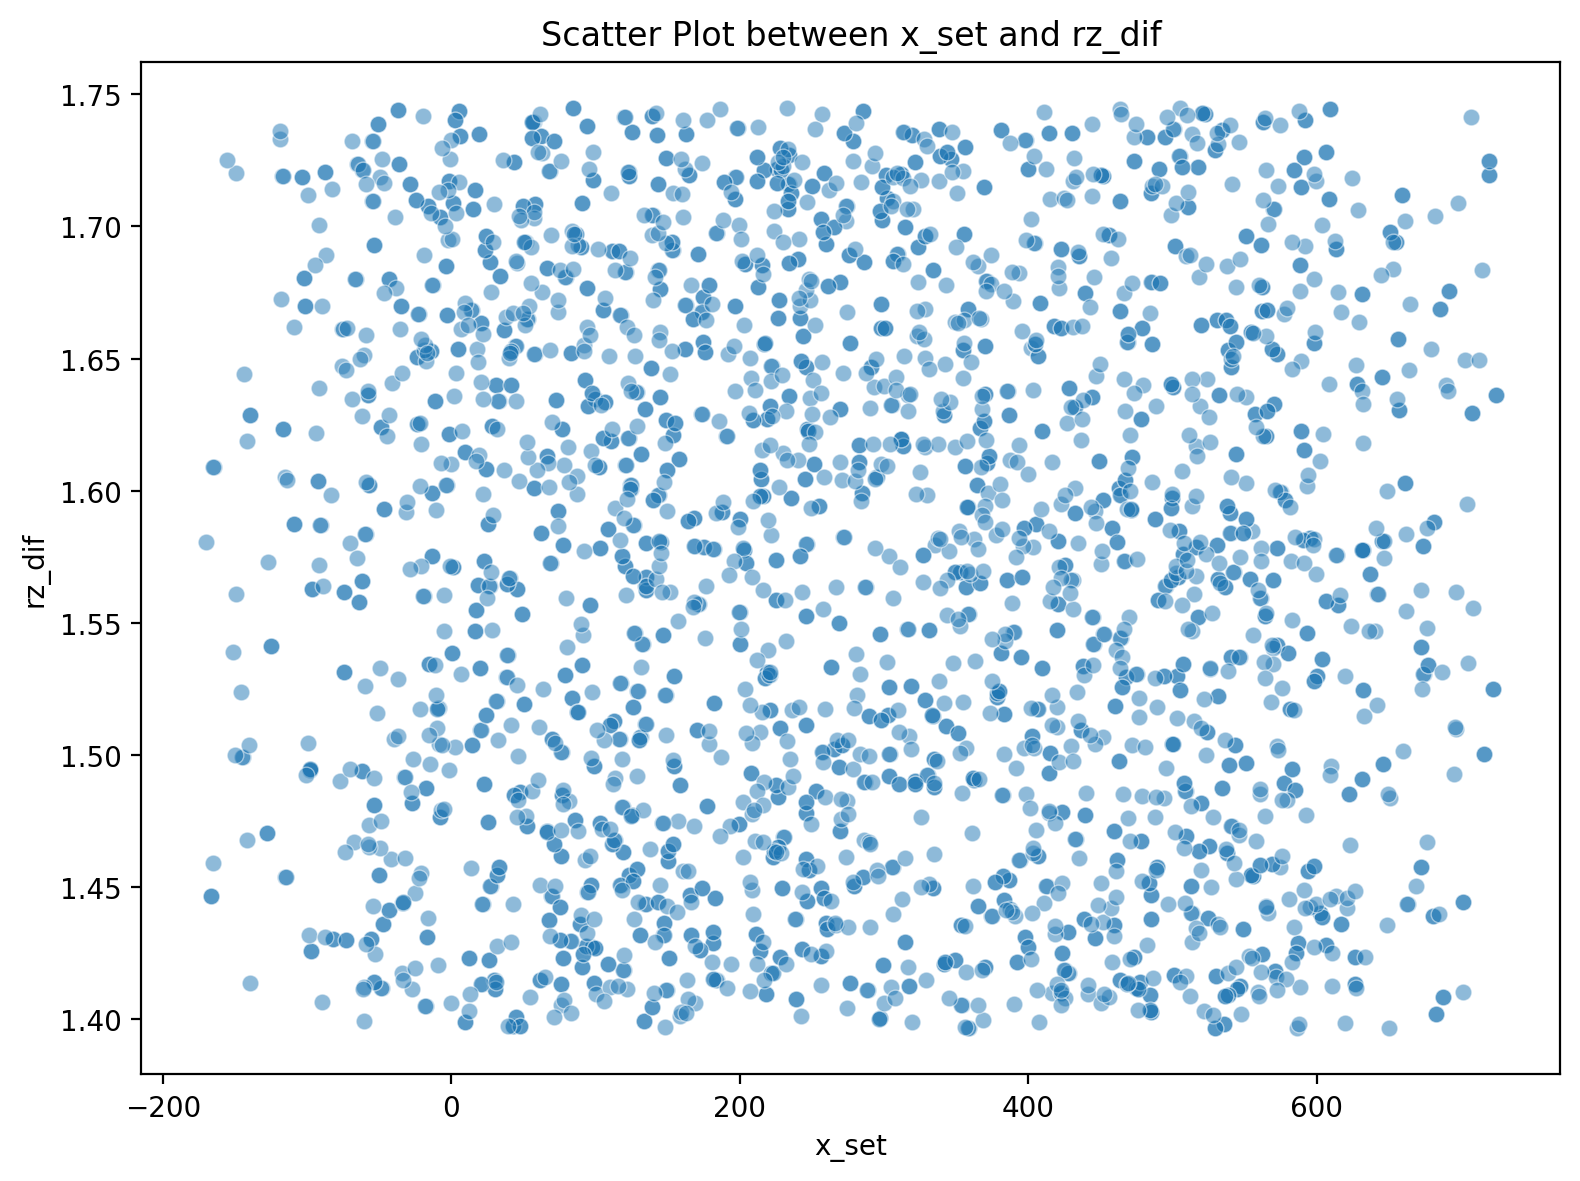

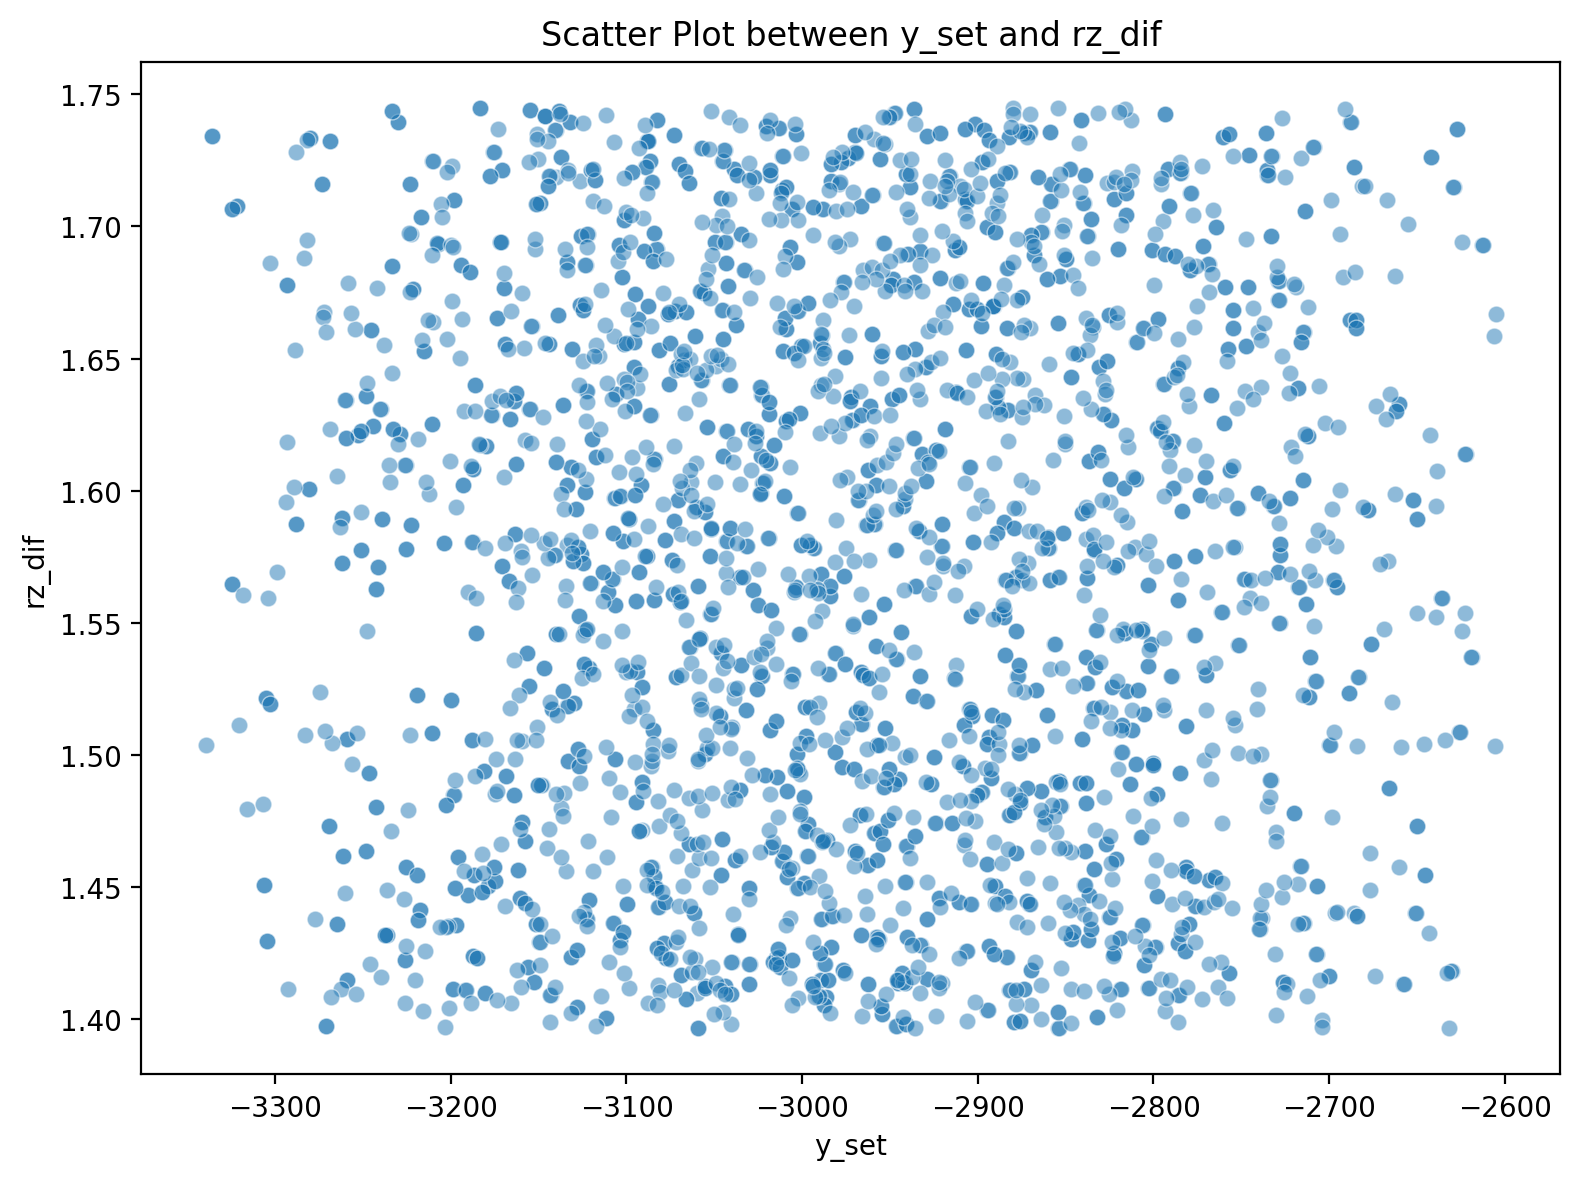

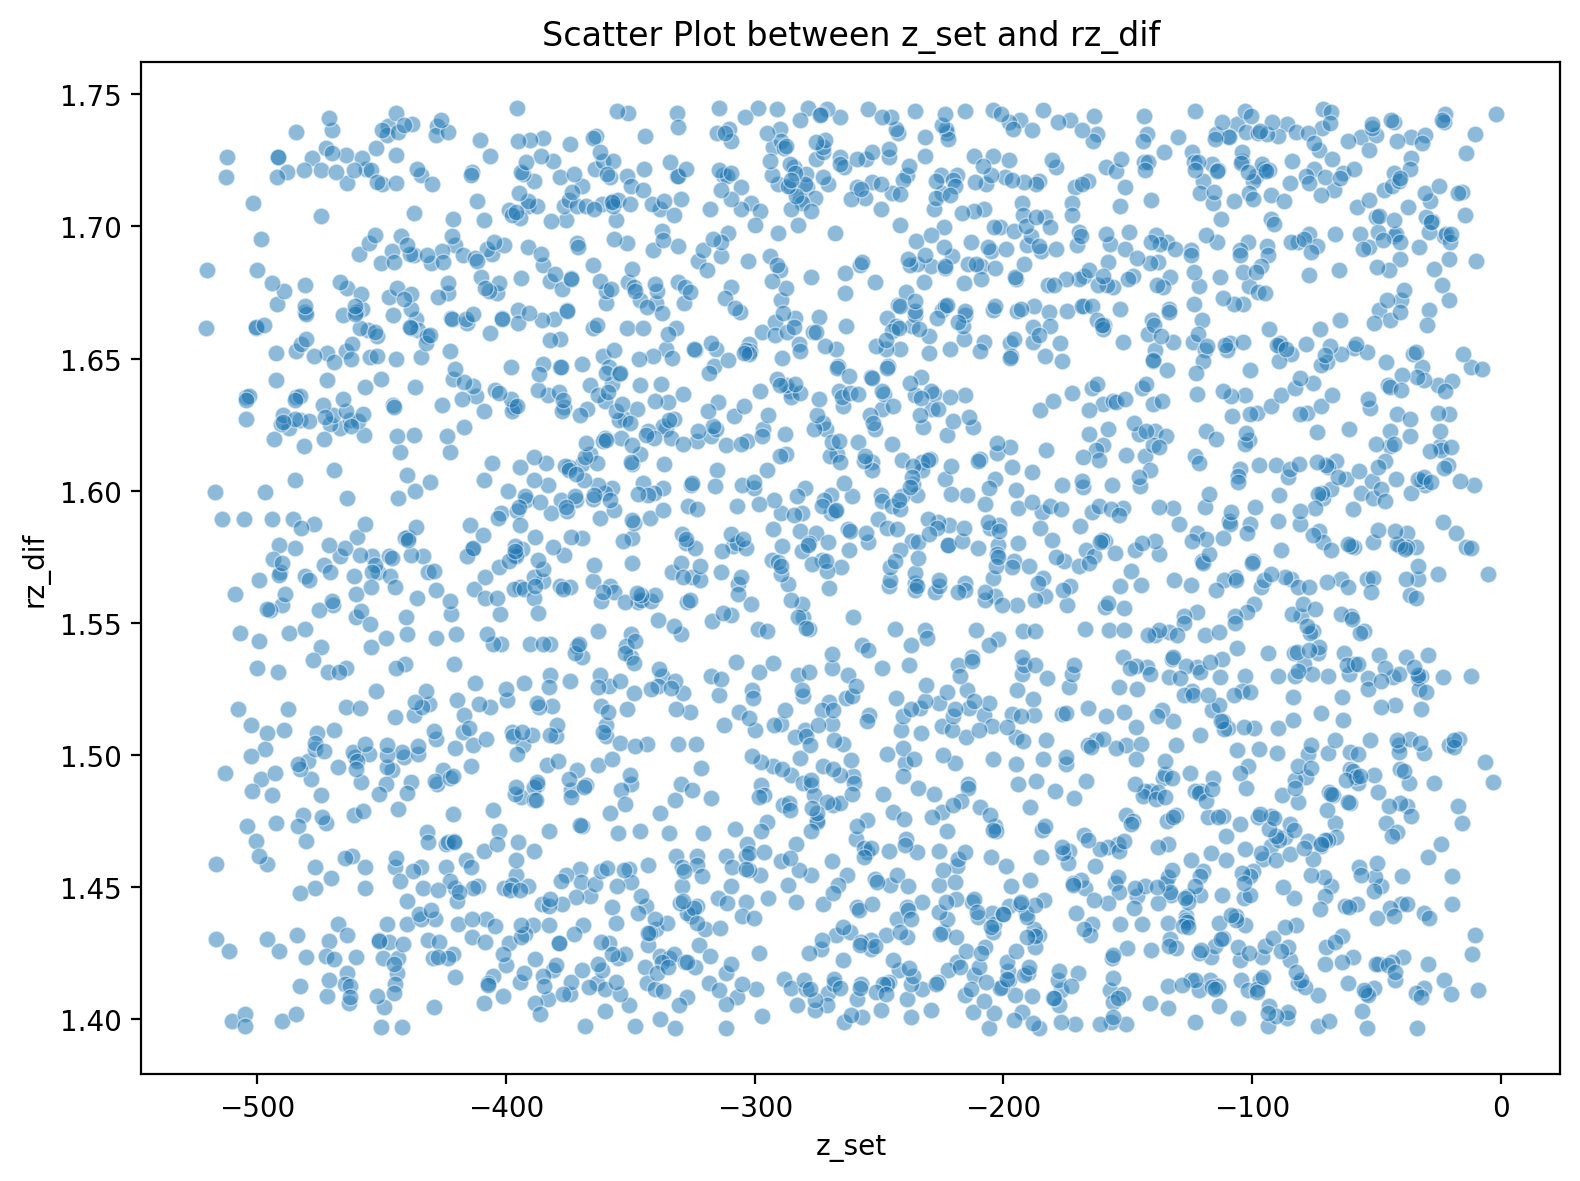

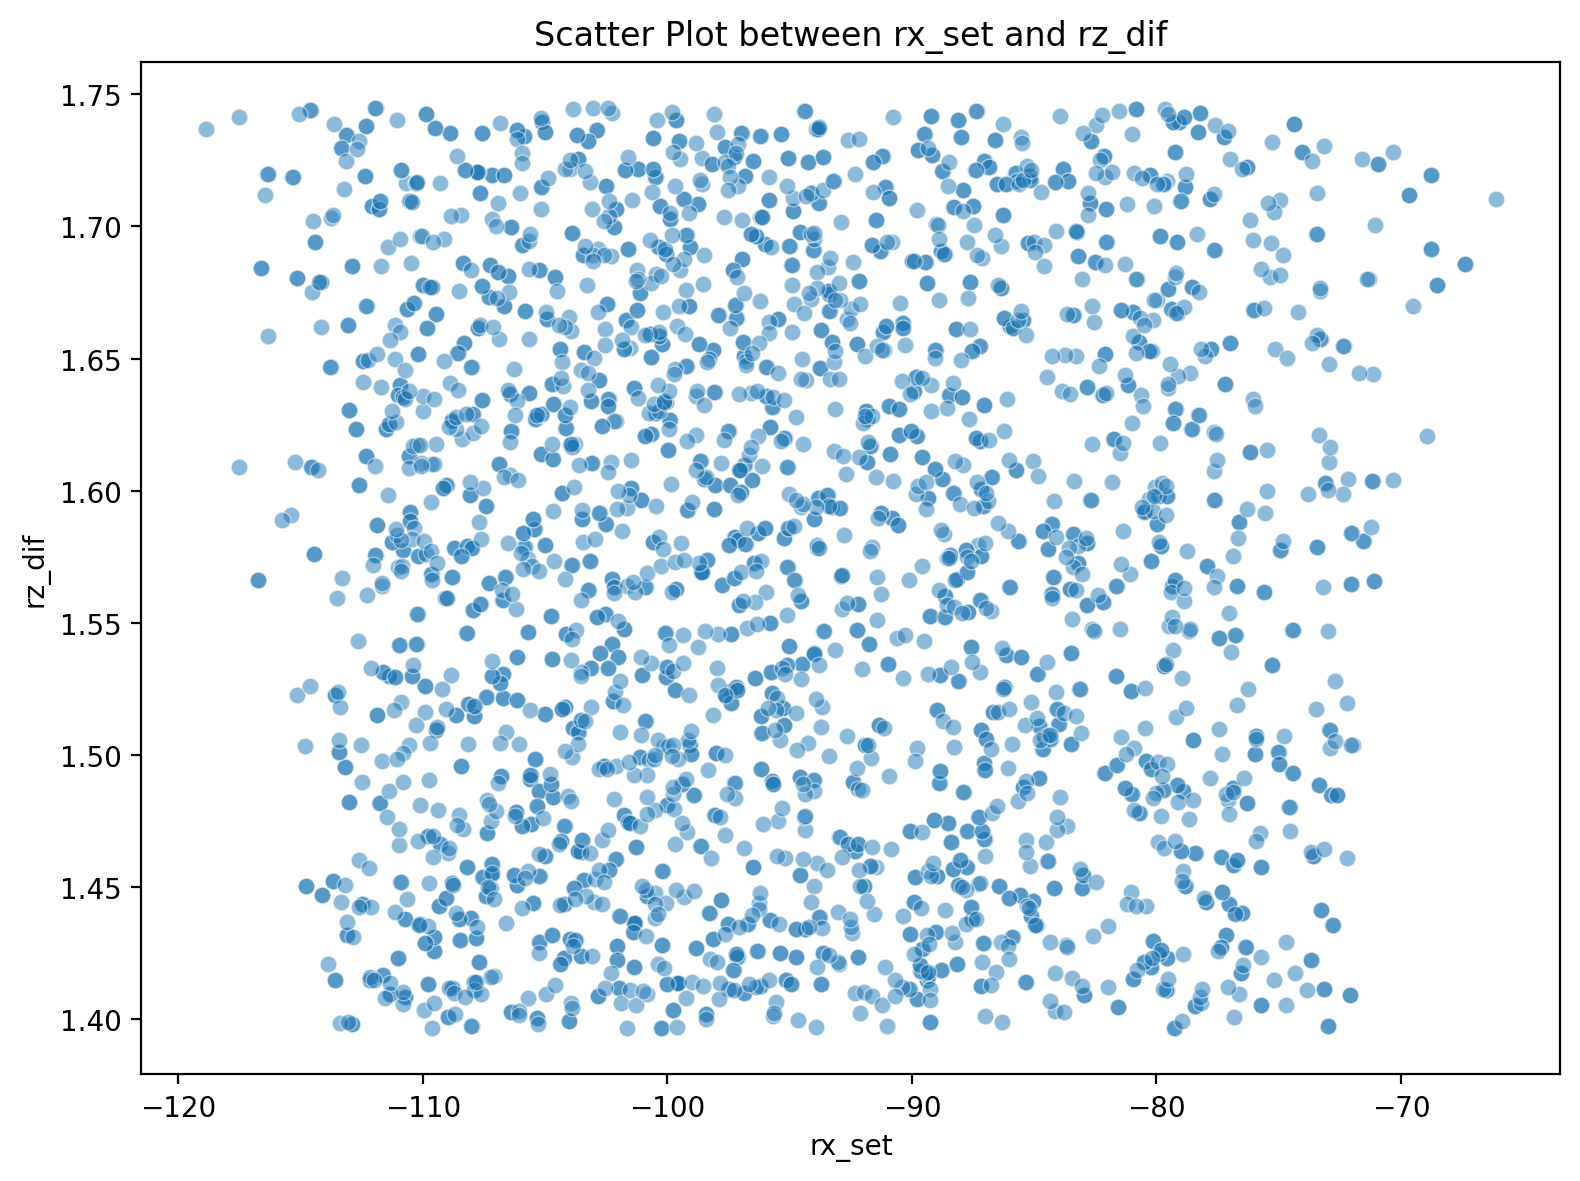

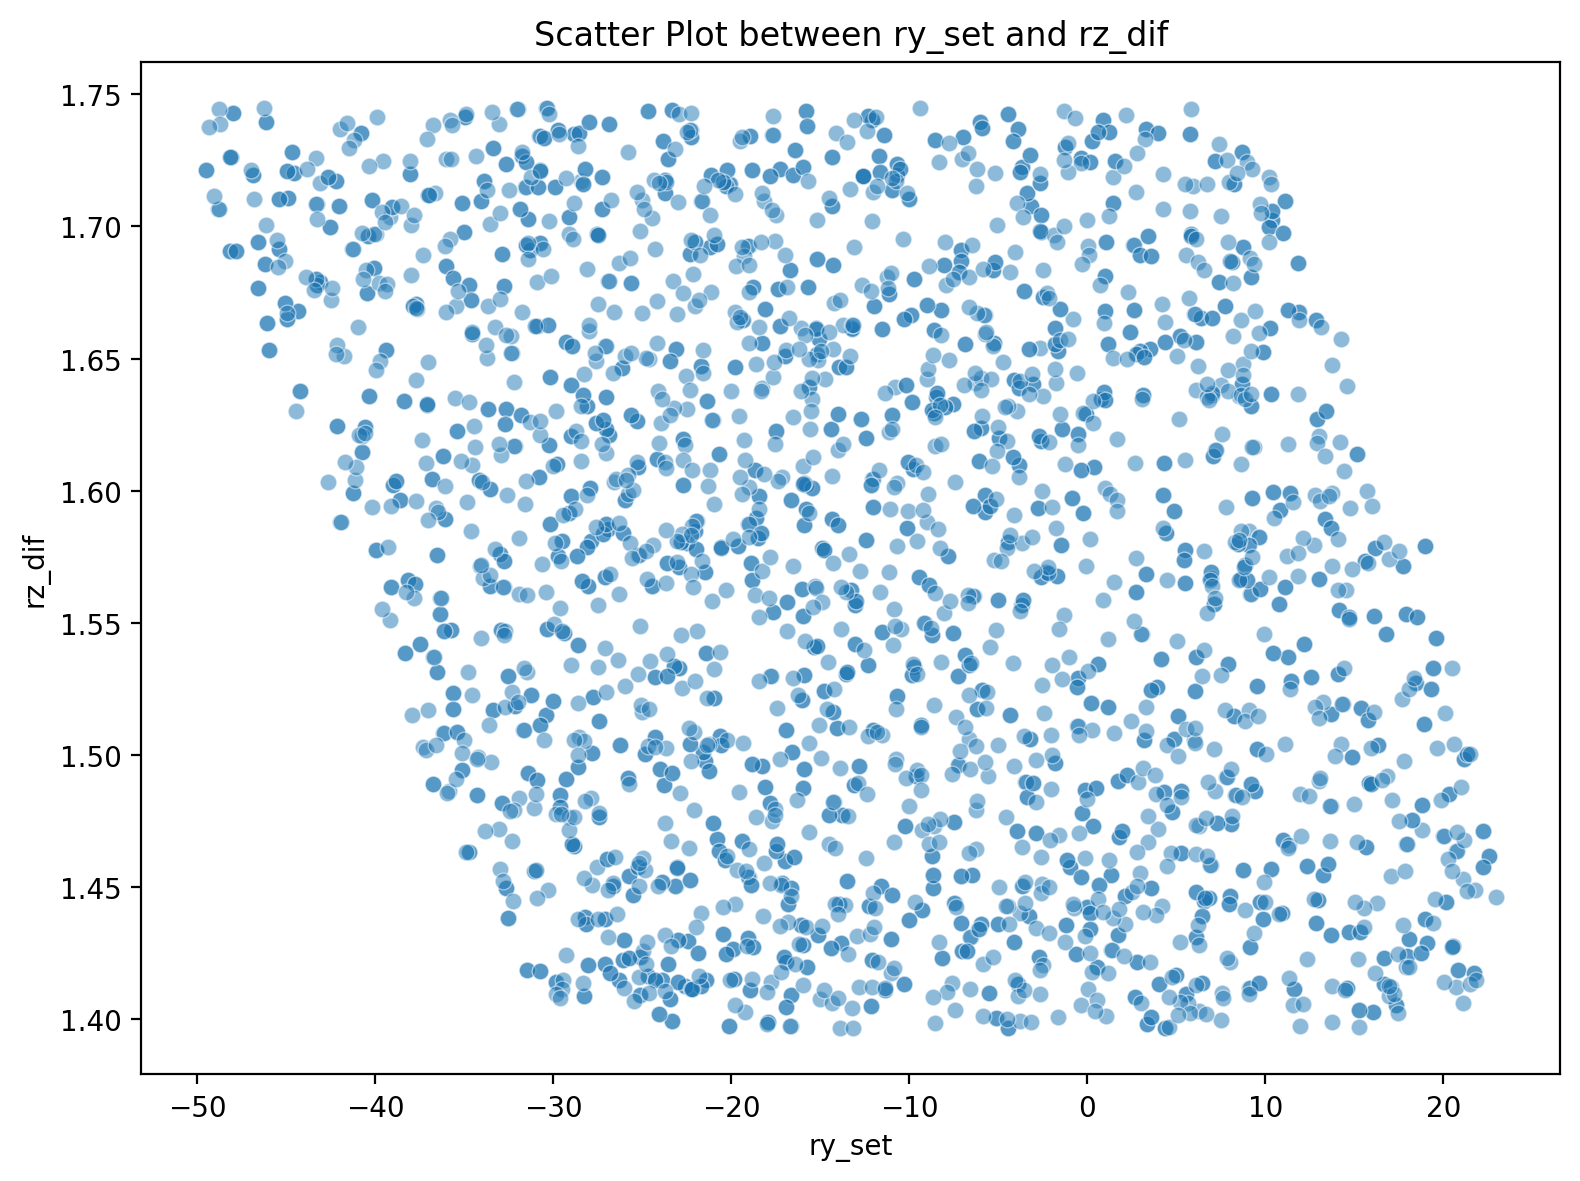

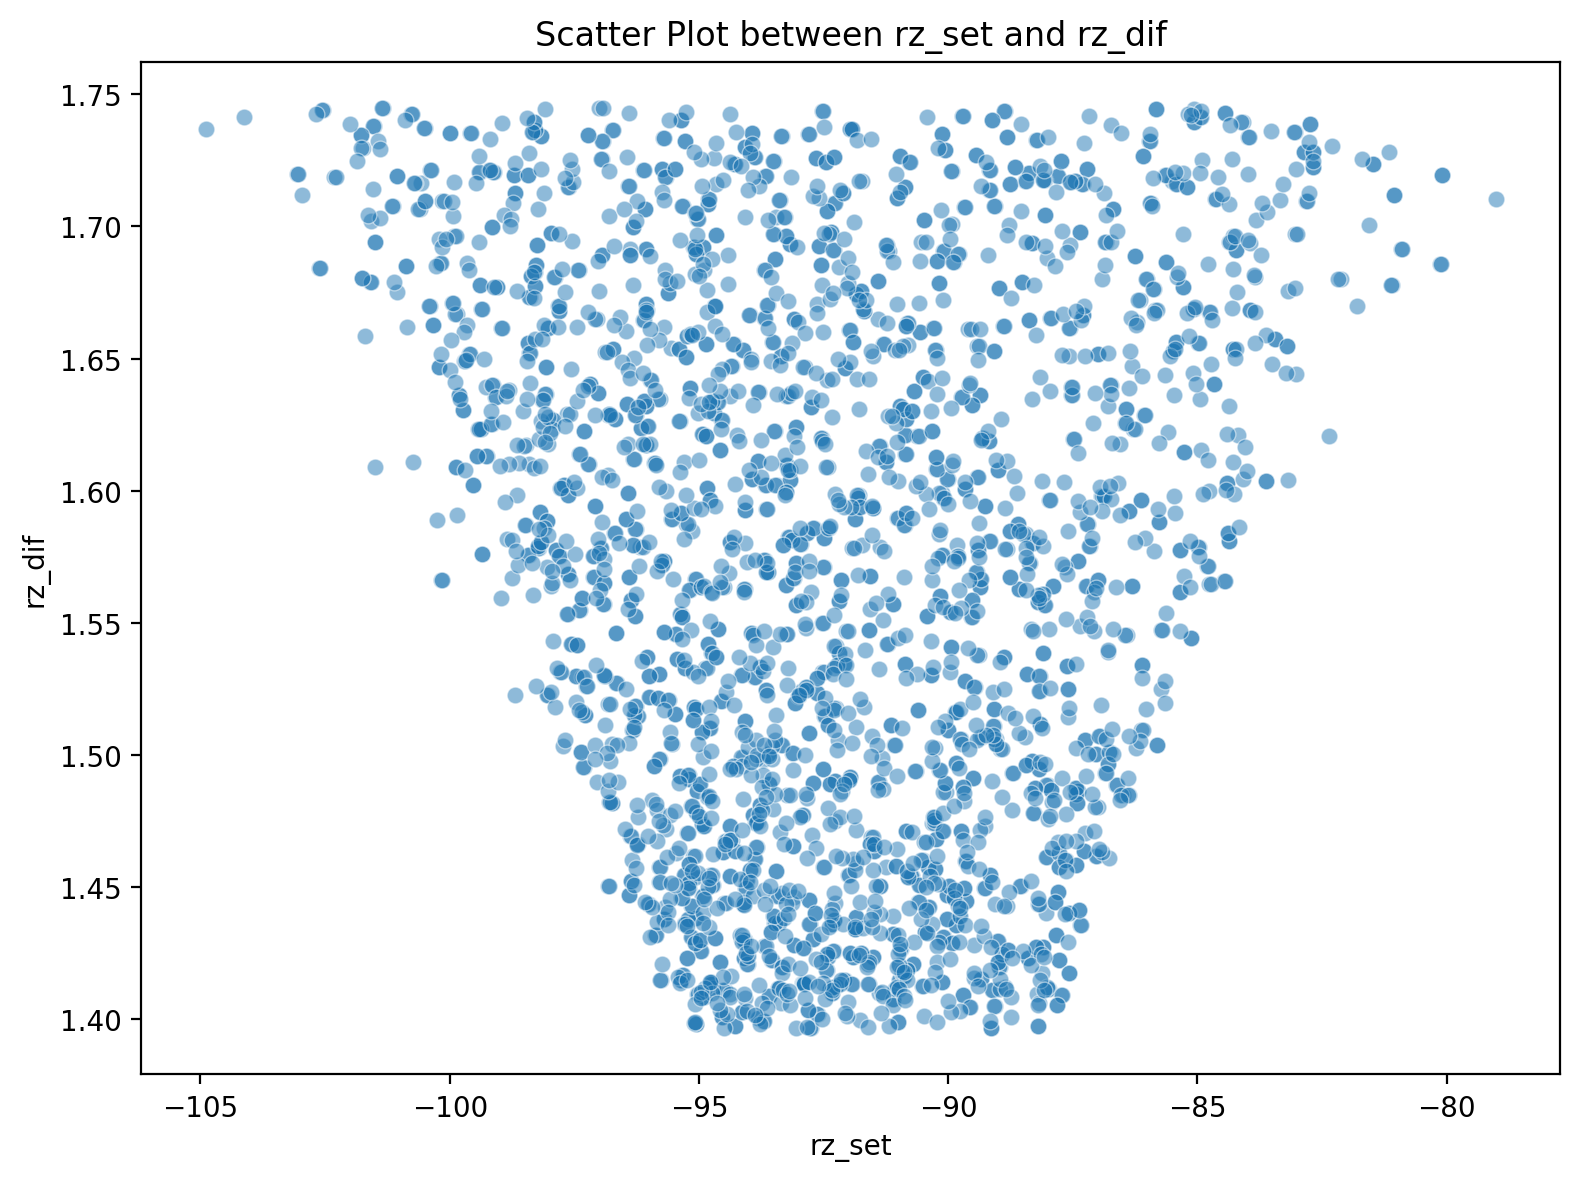

In [41]:
# Scatter plots of input features vs. target variable
for feature in input_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y=target_variable, alpha=0.5)
    plt.title(f"Scatter Plot between {feature} and {target_variable}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.tight_layout()
    plt.show()


In [42]:
# Pairwise correlation among input features
print("Pairwise correlation among input features:")
input_corr_matrix = df[input_features].corr()
input_corr_matrix


Pairwise correlation among input features:


joint_1   joint_2   joint_3   joint_4   joint_5   joint_6     x_set  \
joint_1  1.000000  0.096010  0.078474  0.040865 -0.852883 -0.074529 -0.839215   
joint_2  0.096010  1.000000 -0.707826 -0.048911 -0.075133  0.052954 -0.000713   
joint_3  0.078474 -0.707826  1.000000 -0.080898 -0.040608 -0.028163  0.157388   
joint_4  0.040865 -0.048911 -0.080898  1.000000 -0.073256 -0.985311 -0.110601   
joint_5 -0.852883 -0.075133 -0.040608 -0.073256  1.000000  0.098266  0.649055   
joint_6 -0.074529  0.052954 -0.028163 -0.985311  0.098266  1.000000  0.085691   
x_set   -0.839215 -0.000713  0.157388 -0.110601  0.649055  0.085691  1.000000   
y_set   -0.674134 -0.172745 -0.395574  0.078813  0.495786  0.021496  0.318646   
z_set   -0.073484  0.899016 -0.793483 -0.013909  0.069340  0.067003  0.046990   
rx_set  -0.079936 -0.223042  0.036040  0.013984  0.078985  0.079841  0.070511   
ry_set   0.096981  0.027266 -0.070360  0.075644 -0.586499 -0.071012  0.063419   
rz_set  -0.096319 -0.194737  0.008937  0.019633  0.075741  0.075630  0.088778   

            y_set     z_set    rx_set    ry_set    rz_set  
joint_1 -0.674134 -0.073484 -0.079936  0.096981 -0.096319  
joint_2 -0.172745  0.899016 -0.223042  0.027266 -0.194737  
joint_3 -0.395574 -0.793483  0.036040 -0.070360  0.008937  
joint_4  0.078813 -0.013909  0.013984  0.075644  0.019633  
joint_5  0.495786  0.069340  0.078985 -0.586499  0.075741  
joint_6  0.021496  0.067003  0.079841 -0.071012  0.075630  
x_set    0.318646  0.046990  0.070511  0.063419  0.088778  
y_set    1.000000  0.045356  0.036713  0.059745  0.054244  
z_set    0.045356  1.000000  0.057508 -0.033074  0.071807  
rx_set   0.036713  0.057508  1.000000 -0.046195  0.958152  
ry_set   0.059745 -0.033074 -0.046195  1.000000 -0.011256  
rz_set   0.054244  0.071807  0.958152 -0.011256  1.000000

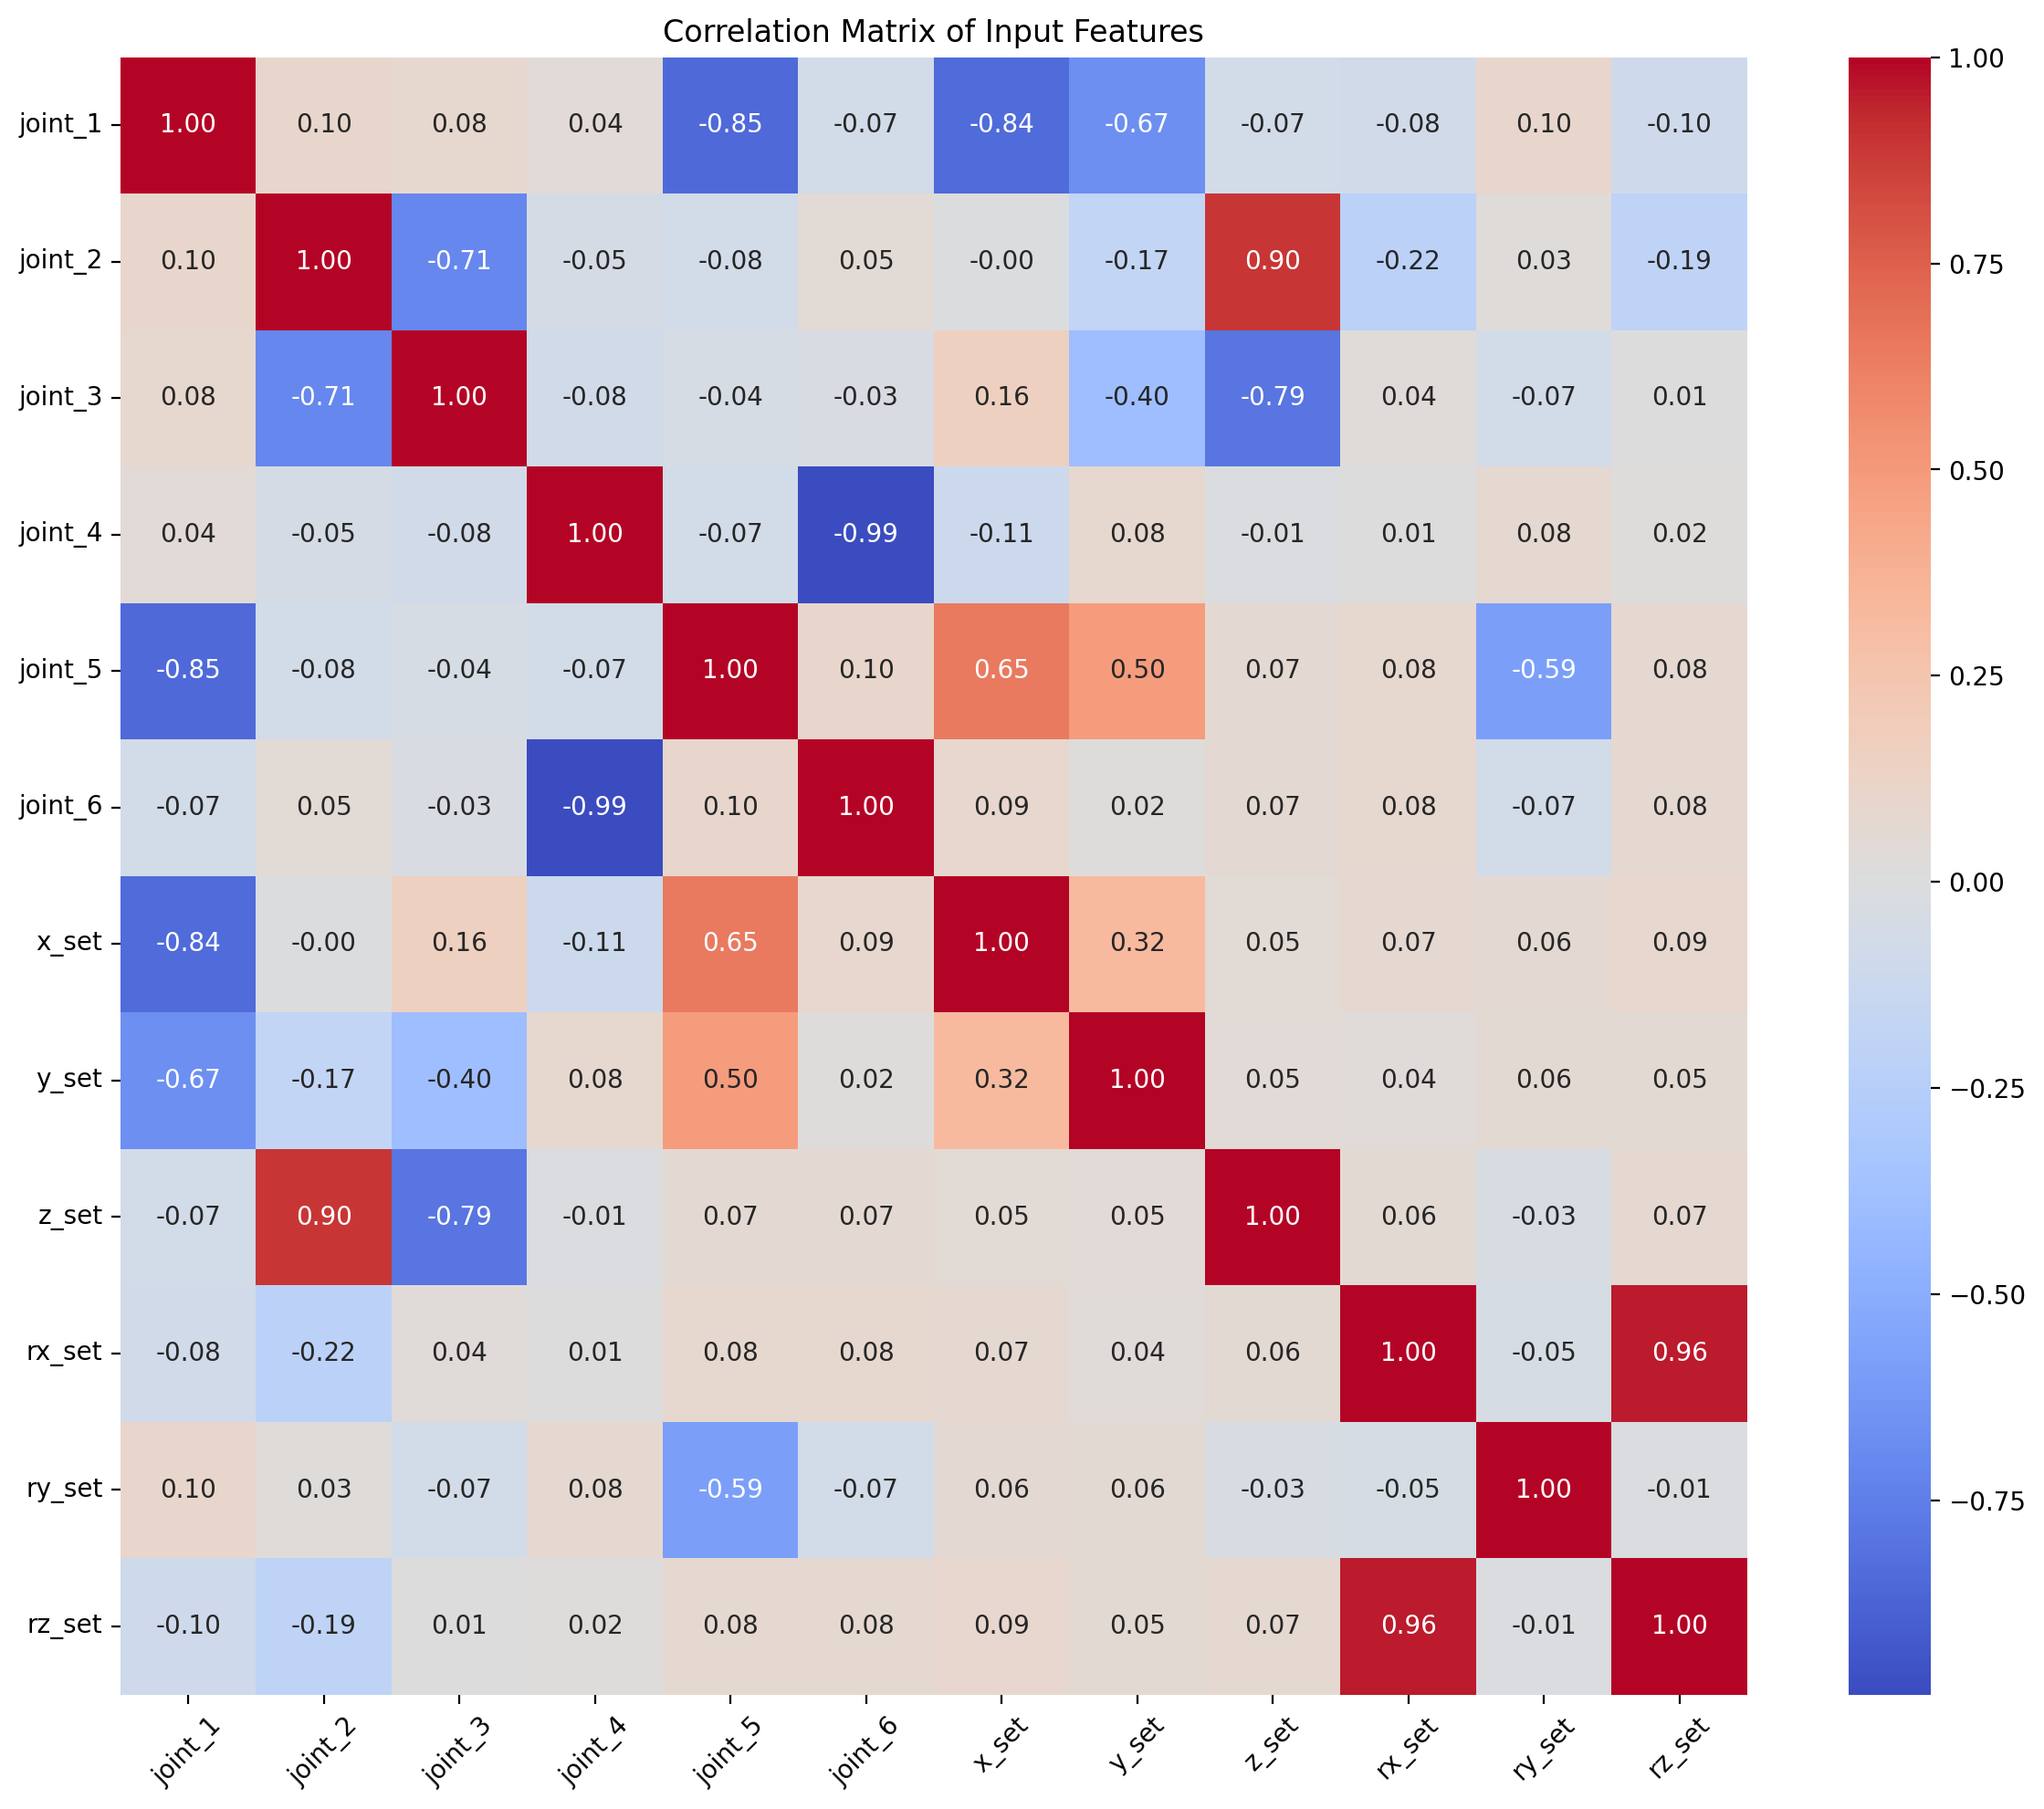

In [43]:
# Visualize input feature correlations with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(input_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Input Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [44]:
# Check for multicollinearity among input features
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Calculating Variance Inflation Factor (VIF) for input features:")

# Prepare data for VIF calculation
X = df[input_features]
X = X.assign(constant=1)  # Add a constant term for intercept

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [
    variance_inflation_factor(X.values, i) for i in range(len(X.columns))
]

# Remove the constant term from VIF data
vif_data = vif_data[vif_data['Feature'] != 'constant']
vif_data = vif_data.reset_index(drop=True)
vif_data


Calculating Variance Inflation Factor (VIF) for input features:


Feature         VIF
0   joint_1   91.575141
1   joint_2   37.510762
2   joint_3   43.296004
3   joint_4  700.694151
4   joint_5  108.071175
5   joint_6  688.555375
6     x_set   13.941785
7     y_set    8.607424
8     z_set   21.071563
9    rx_set   16.020399
10   ry_set   31.098235
11   rz_set   13.370923

In [45]:
# Identify features with high VIF
high_vif = vif_data[vif_data['VIF'] > 5]
print("Features with VIF > 5 (indicating multicollinearity):")
high_vif


Features with VIF > 5 (indicating multicollinearity):


Feature         VIF
0   joint_1   91.575141
1   joint_2   37.510762
2   joint_3   43.296004
3   joint_4  700.694151
4   joint_5  108.071175
5   joint_6  688.555375
6     x_set   13.941785
7     y_set    8.607424
8     z_set   21.071563
9    rx_set   16.020399
10   ry_set   31.098235
11   rz_set   13.370923

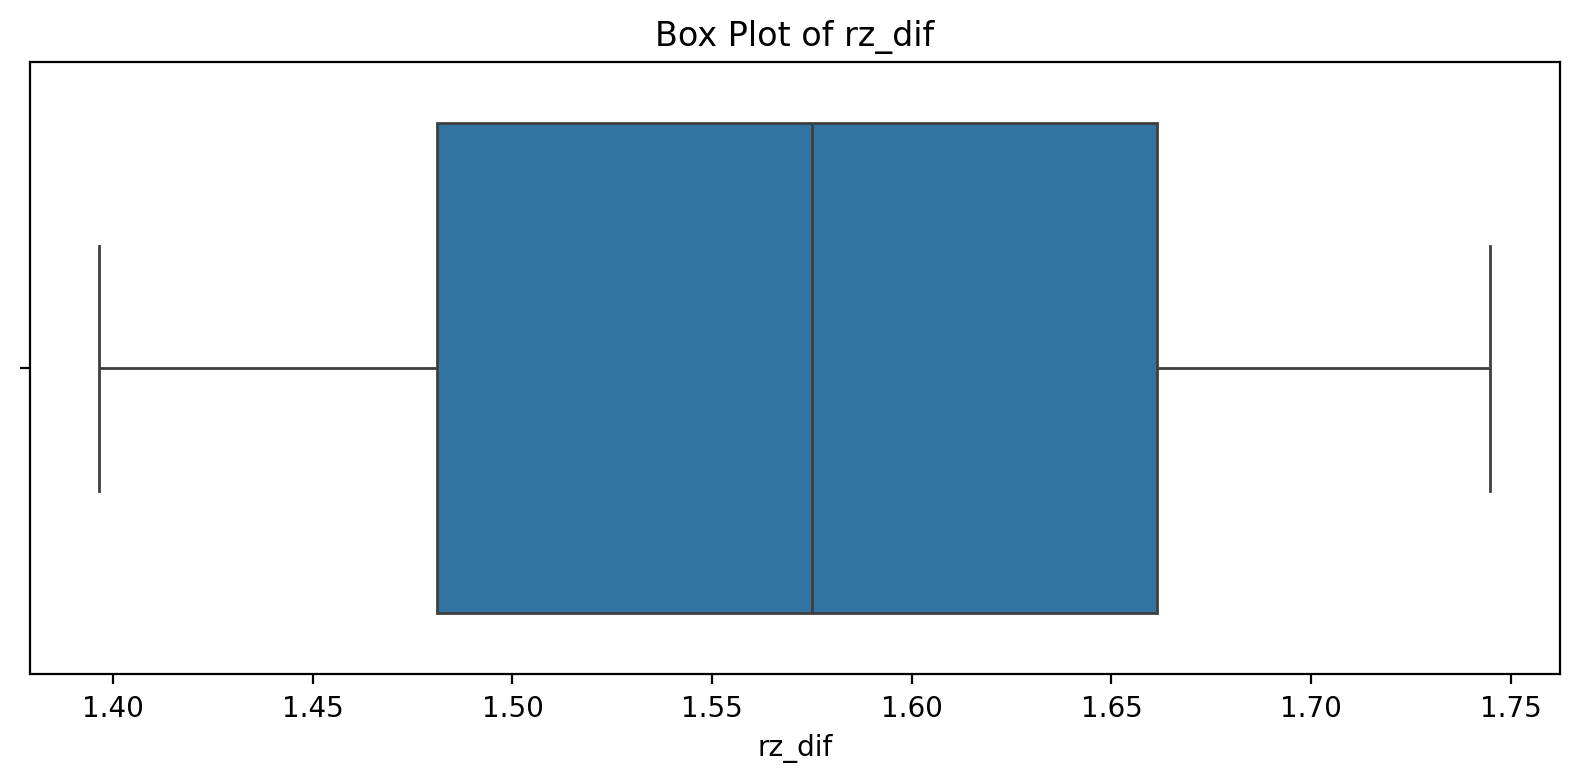

In [46]:
# Box plot to identify outliers in the target variable
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[target_variable])
plt.title(f"Box Plot of {target_variable}")
plt.xlabel(target_variable)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

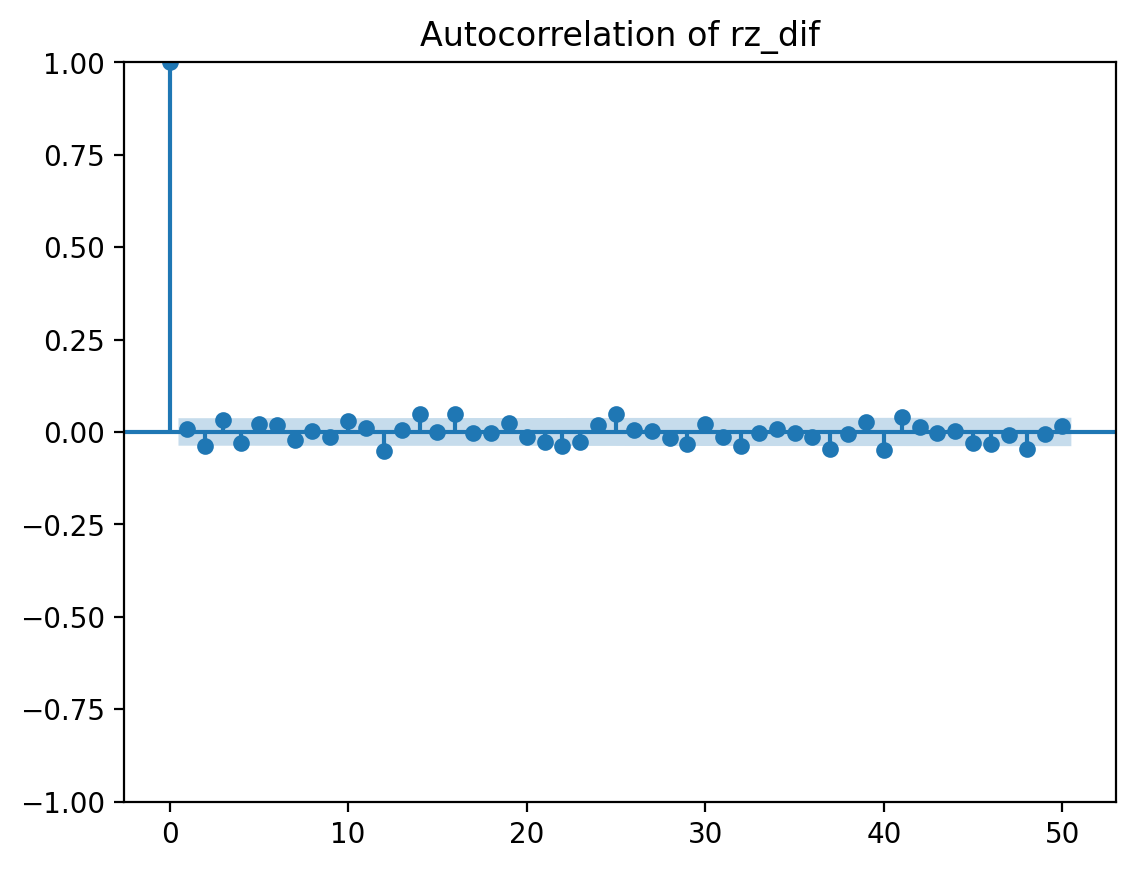

<Figure size 1200x600 with 0 Axes>

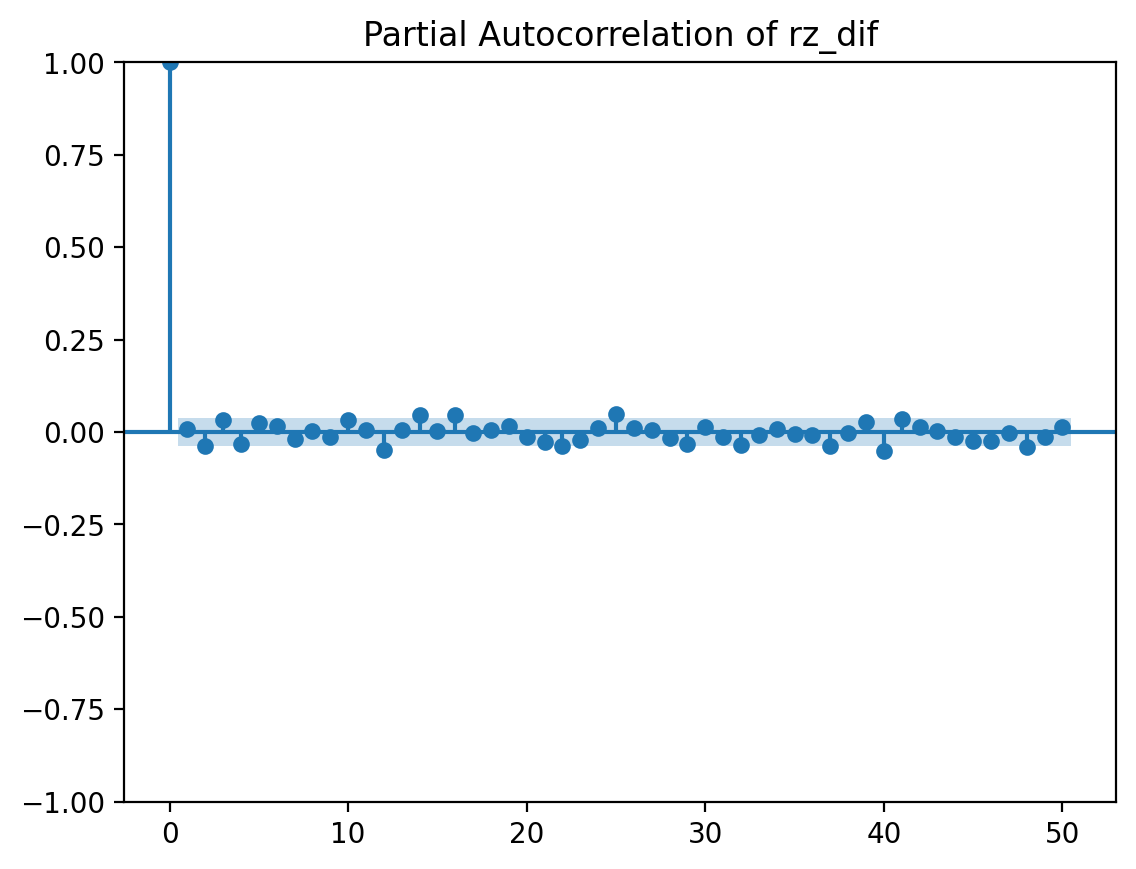

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(df[target_variable], lags=50)
plt.title(f"Autocorrelation of {target_variable}")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df[target_variable], lags=50)
plt.title(f"Partial Autocorrelation of {target_variable}")
plt.show()


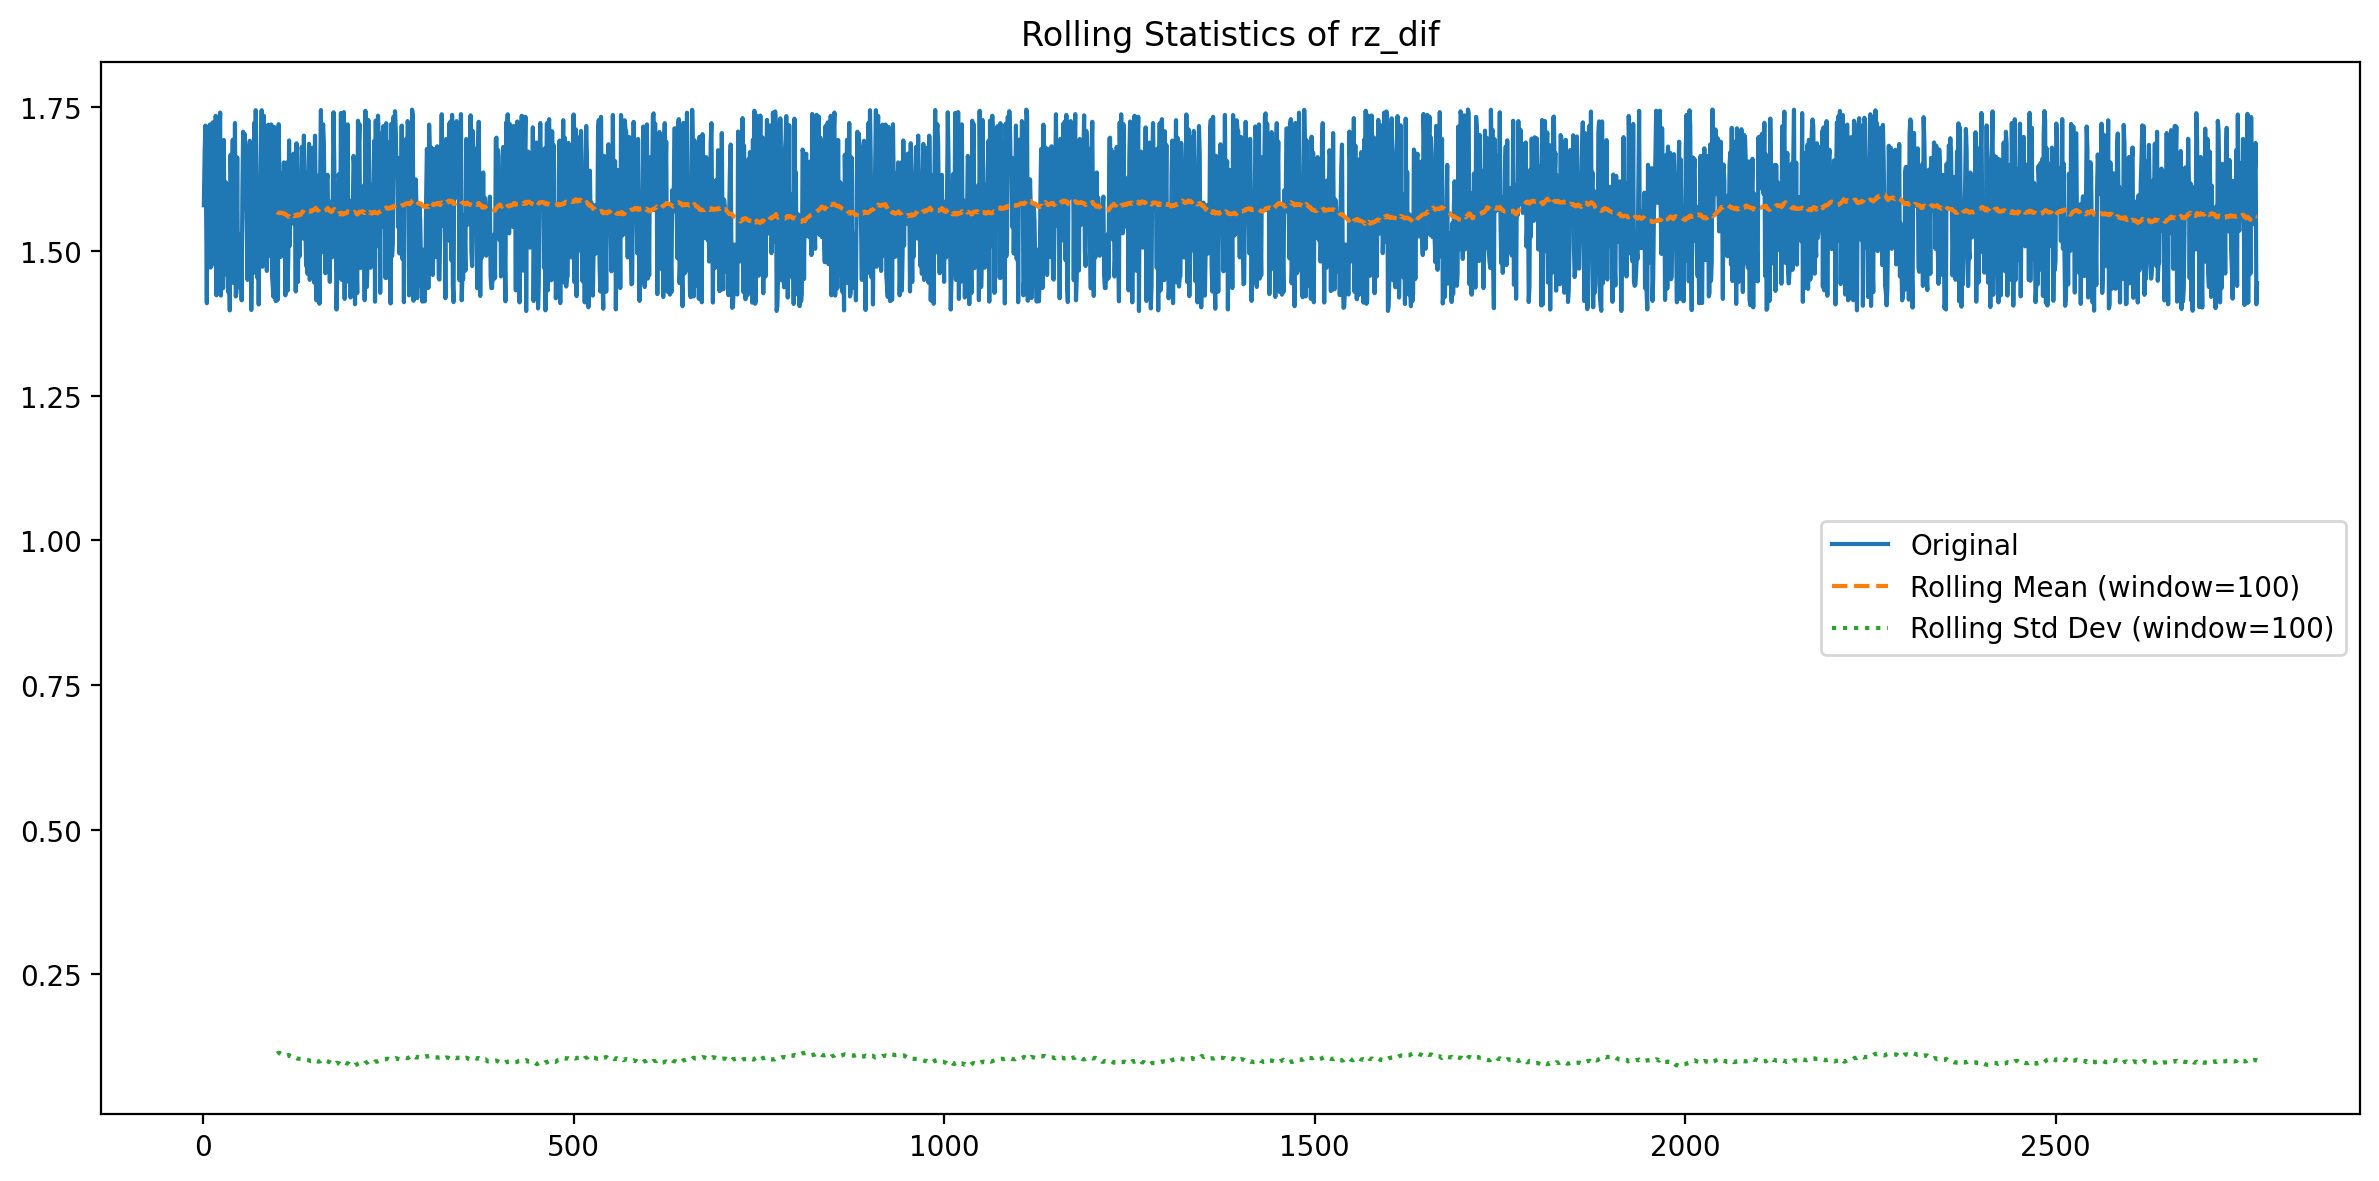

In [50]:
window_size = 100  # Adjust based on your data size
rolling_mean = df[target_variable].rolling(window=window_size).mean()
rolling_std = df[target_variable].rolling(window=window_size).std()

plt.figure(figsize=(12, 6))
plt.plot(df[target_variable], label='Original')
plt.plot(rolling_mean, label=f'Rolling Mean (window={window_size})', linestyle='--')
plt.plot(rolling_std, label=f'Rolling Std Dev (window={window_size})', linestyle=':')
plt.title(f"Rolling Statistics of {target_variable}")
plt.legend()
plt.tight_layout()
plt.show()


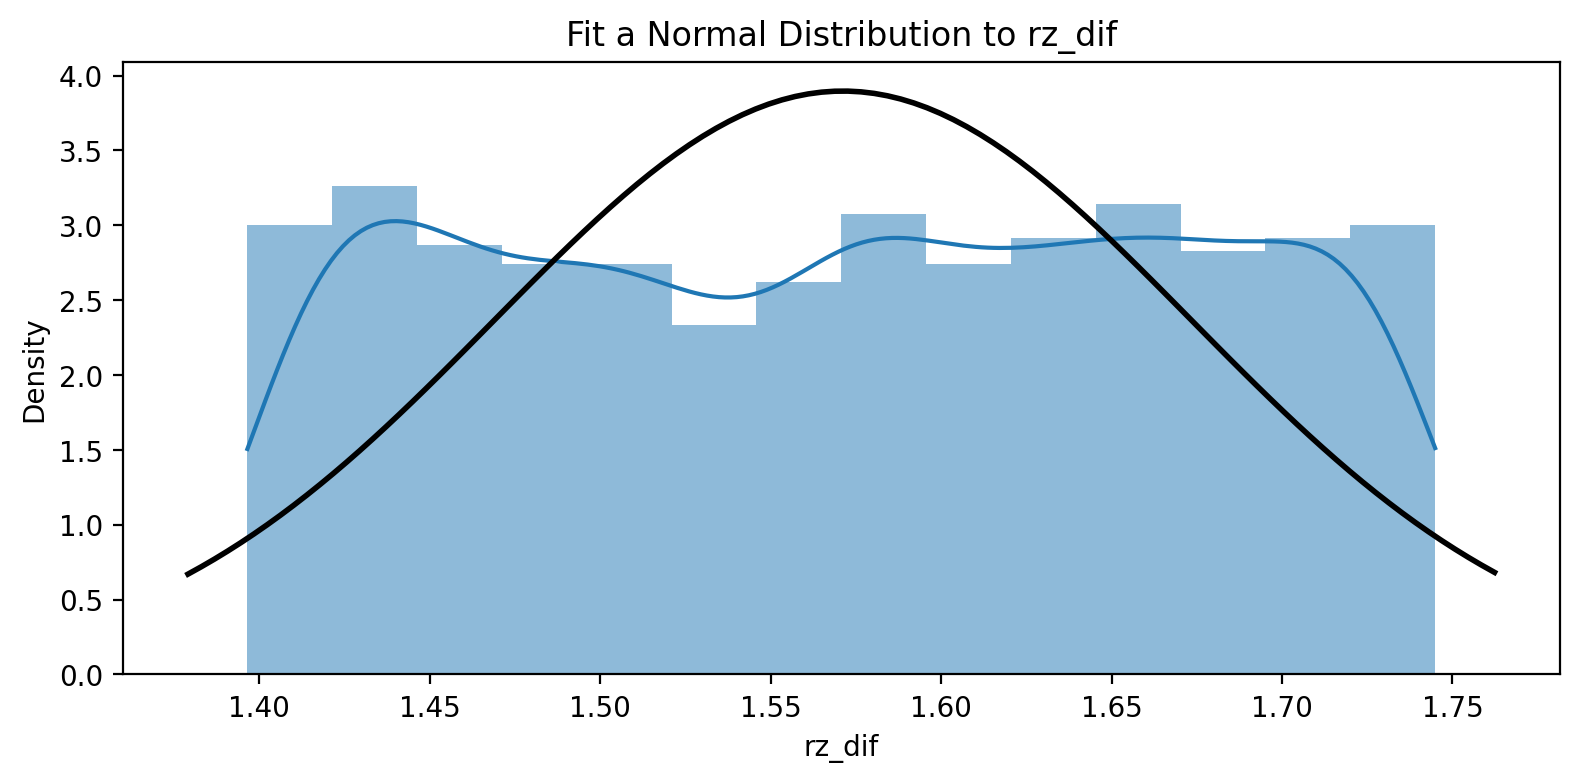

In [51]:
from scipy import stats

# Fit a normal distribution
mu, std = stats.norm.fit(df[target_variable])

# Plot the histogram and the fitted distribution
plt.figure(figsize=(8, 4))
sns.histplot(df[target_variable], kde=True, stat="density", linewidth=0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f"Fit a Normal Distribution to {target_variable}")
plt.tight_layout()
plt.show()


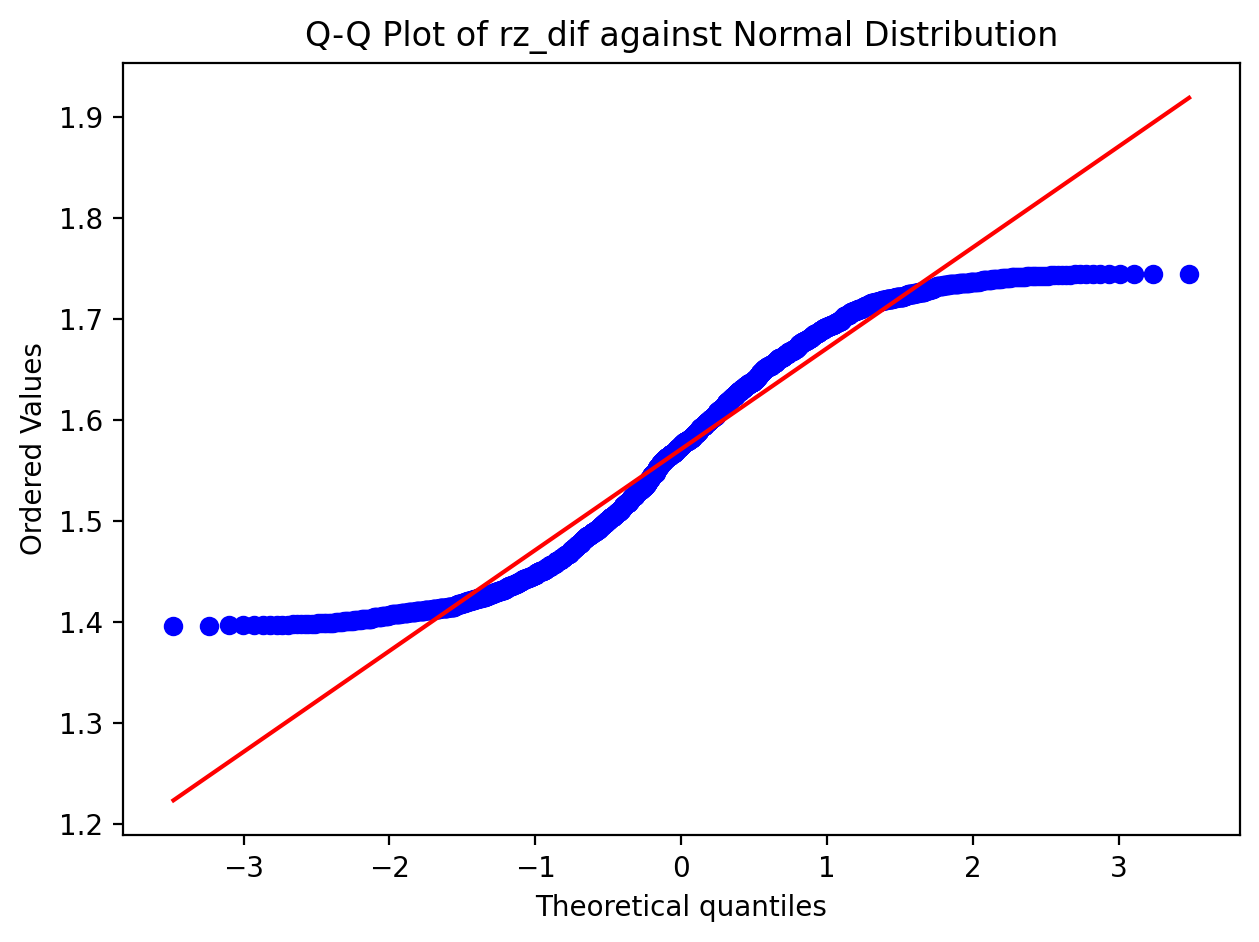

In [52]:
from scipy.stats import probplot

probplot(df[target_variable], dist="norm", plot=plt)
plt.title(f"Q-Q Plot of {target_variable} against Normal Distribution")
plt.tight_layout()
plt.show()


In [53]:
from scipy.stats import zscore

df['z_score'] = zscore(df[target_variable])
outliers = df[df['z_score'].abs() > 3]  # Threshold of 3 for Z-Score
print("Outliers based on Z-Score:")
print(outliers)


Outliers based on Z-Score:
Empty DataFrame
Columns: [step_order, x_dif, y_dif, z_dif, rx_dif, ry_dif, rz_dif, joint_1, joint_2, joint_3, joint_4, joint_5, joint_6, x_set, y_set, z_set, rx_set, ry_set, rz_set, z_score]
Index: []


In [54]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination level
outliers = iso_forest.fit_predict(df[[target_variable]])

# -1 for outliers, 1 for inliers
df['outliers'] = outliers
outliers_df = df[df['outliers'] == -1]
print(f"Number of outliers detected: {len(outliers_df)}")


Number of outliers detected: 139


In [55]:
skewness = df[target_variable].skew()
kurtosis = df[target_variable].kurtosis()

print(f"Skewness of {target_variable}: {skewness}")
print(f"Kurtosis of {target_variable}: {kurtosis}")


Skewness of rz_dif: -0.01805761471951684
Kurtosis of rz_dif: -1.2482038046409467


In [56]:
lag = 1  # 1 step ahead
df['target_lag'] = df[target_variable].shift(lag)

# Correlation with lagged target
lag_corr = df[[target_variable, 'target_lag']].corr()
print(f"Correlation between {target_variable} and its lagged version: {lag_corr}")


Correlation between rz_dif and its lagged version:               rz_dif  target_lag
rz_dif      1.000000    0.008863
target_lag  0.008863    1.000000


In [57]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[target_variable])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -26.90681045793351
p-value: 0.0
